# Educational Process Mining

https://archive-beta.ics.uci.edu/dataset/346/educational+process+mining+epm+a+learning+analytics+data+set

Educational Process Mining (EPM): A Learning Analytics Data Set. (2015). UCI Machine Learning Repository.

This notebook includes exploratory data analysis of inputs, outputs, and inputs to outputs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

### Include functions

In [2]:
%run CMPINF2120_EPM_FUNC_INCL_Over_Lisa.ipynb

### Load the data from github repository

In [3]:
inputs_path_1 = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/inputs_clean_p1.csv'
inputs_path_2 = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/inputs_clean_p2.csv'
inputs_path_3 = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/inputs_clean_p3.csv'
interim_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/interim_df.csv'
final_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/final_df.csv'
pts_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/final_points_lookup.csv'

In [4]:
inputs_p1 = pd.read_csv(inputs_path_1)

In [5]:
inputs_p2 = pd.read_csv(inputs_path_2)

In [6]:
inputs_p3 = pd.read_csv(inputs_path_3)

In [7]:
inputs_init = pd.concat([inputs_p1, inputs_p2, inputs_p3], ignore_index=True, axis=0)

In [8]:
interim_init = pd.read_csv(interim_path)

In [9]:
final_init = pd.read_csv(final_path)

In [10]:
pts_final_lookup = pd.read_csv(pts_path)

In [11]:
inputs_init.columns

Index(['sess', 'sid', 'start_dt', 'end_dt', 'exer', 'actv', 'actv_grp',
       'total_ms', 'idle_ms', 'mw', 'mwc', 'mcl', 'mcr', 'mm', 'ks',
       'total_ms_wdz', 'idle_ms_wdz', 'mw_wdz', 'mwc_wdz', 'mcl_wdz',
       'mcr_wdz', 'mm_wdz', 'ks_wdz', 'total_ms_sqrt', 'idle_ms_sqrt',
       'mw_sqrt', 'mwc_sqrt', 'mcl_sqrt', 'mcr_sqrt', 'mm_sqrt', 'ks_sqrt'],
      dtype='object')

In [12]:
interim_init.columns

Index(['sid', 'interim_scr2', 'interim_scr3', 'interim_scr4', 'interim_scr5',
       'interim_scr6'],
      dtype='object')

In [13]:
final_init.columns

Index(['sid', 'Es_1q1', 'Es_1q2', 'Es_2q1', 'Es_2q2', 'Es_3q1', 'Es_3q2',
       'Es_3q3', 'Es_3q4', 'Es_3q5', 'Es_4q1', 'Es_4q2', 'Es_5q1', 'Es_5q2',
       'Es_5q3', 'Es_6q1', 'Es_6q2', 'final_score'],
      dtype='object')

In [14]:
pts_final_lookup.columns

Index(['question', 'question_points'], dtype='object')

## Inputs
There are 31 columns in the input dataset:

* Two ID columns as type integer
 * `sess`: session number 1-6 
 * `sid`: student id 1-115
* Five object columns, two should be dates
 * `exer`: exercise
 * `actv`: activity
 * `actv_grp`: activity group derived from `actv`, which is a composite variable consisting of the exercise number and the activty
 * `start_dt`: datetime that the activity was started
 * `end_dt`: datetime that the actvitiy was stopped
* Twenty-four numeric columns
 * `total_ms`: total time in milliseconds derived from subtracting `start_dt` from `end_dt`
 * `idle_ms`: total idel time in milliseconds
 * `mm`: number of mouse wheel movements
 * `mwc`: number of mouse wheel clicks
 * `mcl`: number of left clicks of the mouse
 * `mcr`: number of right clicks of the mouse 
 * `mm`: number of mouse movements
 * `ks`: number of keystokes
 * `total_ms_wdz`, `idle_ms_wdz`, `mm_wdz`, `mwc_wdz`, `mcl_wdz`, `mm_wdz`, `ks_wdz`: numeric variables transformed by windsorizing
 * `total_ms_sqrt`, `idle_ms_sqrt`, `mm_sqrt`, `mwc_sqrt`, `mcl_sqrt`, `mm_sqrt`, `ks_sqrt`: numeric variables transformed by taking the square root
 
There are 227,129 records in the dataset.

There is 1 missing value each for `total_ms` and `total_ms_sqrt` because `start_dt` was greater than `end_dt`, which resulted in a negative total time in milliseconds, so `total_ms` was changed to Nan for that record. There are 158 missing values each for `idle_ms` and `idle_ms_sqrt` because `idle_ms` was negative for these records, so these values were changed to Nan. 

#### Each record represents a student participating in an activity within an exercise within a session.

In [15]:
inputs_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227129 entries, 0 to 227128
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sess           227129 non-null  int64  
 1   sid            227129 non-null  int64  
 2   start_dt       227129 non-null  object 
 3   end_dt         227128 non-null  object 
 4   exer           227129 non-null  object 
 5   actv           227129 non-null  object 
 6   actv_grp       227129 non-null  object 
 7   total_ms       227128 non-null  float64
 8   idle_ms        226971 non-null  float64
 9   mw             227129 non-null  int64  
 10  mwc            227129 non-null  int64  
 11  mcl            227129 non-null  int64  
 12  mcr            227129 non-null  int64  
 13  mm             227129 non-null  int64  
 14  ks             227129 non-null  int64  
 15  total_ms_wdz   227129 non-null  float64
 16  idle_ms_wdz    227129 non-null  float64
 17  mw_wdz         227129 non-nul

In [16]:
inputs_init.isna().sum()

sess               0
sid                0
start_dt           0
end_dt             1
exer               0
actv               0
actv_grp           0
total_ms           1
idle_ms          158
mw                 0
mwc                0
mcl                0
mcr                0
mm                 0
ks                 0
total_ms_wdz       0
idle_ms_wdz        0
mw_wdz             0
mwc_wdz            0
mcl_wdz            0
mcr_wdz            0
mm_wdz             0
ks_wdz             0
total_ms_sqrt      1
idle_ms_sqrt     158
mw_sqrt            0
mwc_sqrt           0
mcl_sqrt           0
mcr_sqrt           0
mm_sqrt            0
ks_sqrt            0
dtype: int64

In [17]:
inputs_init['sid'] = inputs_init['sid'].astype('object')
inputs_init['sess'] = inputs_init['sess'].astype('object')

In [18]:
sqrt_vars = get_var_list(inputs_init,['sqrt'])
wdz_vars = get_var_list(inputs_init,['wdz'])
sqrt_ms_vars = get_var_list(inputs_init,['ms_sqrt'])
wdz_ms_vars = get_var_list(inputs_init,['ms_wdz'])
orig_ms_vars = get_var_list(inputs_init, ['ms'])
cat_vars = inputs_init.drop(columns=['actv','start_dt','end_dt']).copy().select_dtypes('object').columns.to_list()

In [19]:
num_vars = inputs_init.select_dtypes('number').columns.to_list()
num_vars

['total_ms',
 'idle_ms',
 'mw',
 'mwc',
 'mcl',
 'mcr',
 'mm',
 'ks',
 'total_ms_wdz',
 'idle_ms_wdz',
 'mw_wdz',
 'mwc_wdz',
 'mcl_wdz',
 'mcr_wdz',
 'mm_wdz',
 'ks_wdz',
 'total_ms_sqrt',
 'idle_ms_sqrt',
 'mw_sqrt',
 'mwc_sqrt',
 'mcl_sqrt',
 'mcr_sqrt',
 'mm_sqrt',
 'ks_sqrt']

In [20]:
orig_vars = [v for v in num_vars if v not in sqrt_vars + wdz_vars]
orig_vars

['total_ms', 'idle_ms', 'mw', 'mwc', 'mcl', 'mcr', 'mm', 'ks']

In [21]:
activity_orig_vars = [v for v in orig_vars if v not in orig_ms_vars]
activity_orig_vars

['mw', 'mwc', 'mcl', 'mcr', 'mm', 'ks']

In [22]:
activity_sqrt_vars = [v for v in sqrt_vars if v not in sqrt_ms_vars]
activity_sqrt_vars

['mw_sqrt', 'mwc_sqrt', 'mcl_sqrt', 'mcr_sqrt', 'mm_sqrt', 'ks_sqrt']

In [23]:
activity_wdz_vars = [v for v in wdz_vars if v not in wdz_ms_vars]
activity_wdz_vars

['mw_wdz', 'mwc_wdz', 'mcl_wdz', 'mcr_wdz', 'mm_wdz', 'ks_wdz']

In [24]:
cat_vars

['sess', 'sid', 'exer', 'actv_grp']

In [25]:
sqrt_vars

['total_ms_sqrt',
 'idle_ms_sqrt',
 'mw_sqrt',
 'mwc_sqrt',
 'mcl_sqrt',
 'mcr_sqrt',
 'mm_sqrt',
 'ks_sqrt']

In [26]:
wdz_vars

['total_ms_wdz',
 'idle_ms_wdz',
 'mw_wdz',
 'mwc_wdz',
 'mcl_wdz',
 'mcr_wdz',
 'mm_wdz',
 'ks_wdz']

## Outputs
There are two output files, one with intermediate scores and one with final exam scores. Each dataset has the `sid` variable for merging input and output data. The intermediate data also have the `sess` variable.

The intermediate output data include the `sid` and `sess` key variables and five float variables, one intermediate grade for each session 2-6. Each record represents the collection of intermediate scores for each student. There are 115 records and no missing data. All 115 students have an intermediate score for sessions 2-6.

The final output data include the `sid` key variable and 17 float variables. Sixteen of the float variables is the score for one question on the final exam. The last float variable, `final_score`, is the composite score for the final exam. Each record represents the collection of scores for individual questions and the final composite score for each student. There are 62 records and no missing data. Not all students took the final exam, therefore, there are missing records for those students. 

In [27]:
interim_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sid           115 non-null    int64  
 1   interim_scr2  115 non-null    float64
 2   interim_scr3  115 non-null    float64
 3   interim_scr4  115 non-null    float64
 4   interim_scr5  115 non-null    float64
 5   interim_scr6  115 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [28]:
interim_init.isna().sum()

sid             0
interim_scr2    0
interim_scr3    0
interim_scr4    0
interim_scr5    0
interim_scr6    0
dtype: int64

In [29]:
final_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sid          62 non-null     int64  
 1   Es_1q1       62 non-null     float64
 2   Es_1q2       62 non-null     float64
 3   Es_2q1       62 non-null     float64
 4   Es_2q2       62 non-null     float64
 5   Es_3q1       62 non-null     float64
 6   Es_3q2       62 non-null     float64
 7   Es_3q3       62 non-null     float64
 8   Es_3q4       62 non-null     float64
 9   Es_3q5       62 non-null     float64
 10  Es_4q1       62 non-null     float64
 11  Es_4q2       62 non-null     float64
 12  Es_5q1       62 non-null     float64
 13  Es_5q2       62 non-null     float64
 14  Es_5q3       62 non-null     float64
 15  Es_6q1       62 non-null     float64
 16  Es_6q2       62 non-null     float64
 17  final_score  62 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 8.8 KB


In [30]:
final_init.isna().sum()

sid            0
Es_1q1         0
Es_1q2         0
Es_2q1         0
Es_2q2         0
Es_3q1         0
Es_3q2         0
Es_3q3         0
Es_3q4         0
Es_3q5         0
Es_4q1         0
Es_4q2         0
Es_5q1         0
Es_5q2         0
Es_5q3         0
Es_6q1         0
Es_6q2         0
final_score    0
dtype: int64

In [31]:
pts_final_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   question         17 non-null     object
 1   question_points  17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [32]:
pts_final_lookup.question.unique()

array(['Es_1q1', 'Es_1q2', 'Es_2q1', 'Es_2q2', 'Es_3q1', 'Es_3q2',
       'Es_3q3', 'Es_3q4', 'Es_3q5', 'Es_4q1', 'Es_4q2', 'Es_5q1',
       'Es_5q2', 'Es_5q3', 'Es_6q1', 'Es_6q2', 'final_score'],
      dtype=object)

#### Add classification variable to indicate event 'pass' if composite score is greater than or equal to 70

In [33]:
final_init['pass'] = np.where( final_init['final_score'] >= 70, 1, 0 )

## Explore the input data

In [34]:
inputs_df = inputs_init.copy()

In [35]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227129 entries, 0 to 227128
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sess           227129 non-null  object 
 1   sid            227129 non-null  object 
 2   start_dt       227129 non-null  object 
 3   end_dt         227128 non-null  object 
 4   exer           227129 non-null  object 
 5   actv           227129 non-null  object 
 6   actv_grp       227129 non-null  object 
 7   total_ms       227128 non-null  float64
 8   idle_ms        226971 non-null  float64
 9   mw             227129 non-null  int64  
 10  mwc            227129 non-null  int64  
 11  mcl            227129 non-null  int64  
 12  mcr            227129 non-null  int64  
 13  mm             227129 non-null  int64  
 14  ks             227129 non-null  int64  
 15  total_ms_wdz   227129 non-null  float64
 16  idle_ms_wdz    227129 non-null  float64
 17  mw_wdz         227129 non-nul

In [36]:
inputs_df.exer.value_counts()

Es_4_5    22091
Es_6_3    19290
Es_6_2    15996
Es_6_1    13505
Es_5_4    12217
Es_1_1    11406
Es_2_2    10414
Es_3_2    10131
Es_1_2     9614
Es_5_1     9090
Es_2_1     7952
Es_3_1     7637
Es_2_4     7559
Es_5_3     7219
Es_1_3     6716
Es_2_3     6082
Es_4_1     5727
Es_1_4     5502
Es_3_4     5344
Es_5_2     5156
Es_3_3     4680
Es_2_5     4241
Es_4_2     4044
Es_4_3     3757
Es_4_4     3364
Es_6_4     2939
Es         2647
Es_2_6     2573
Es_6_6      135
Es_6_5      101
Name: exer, dtype: int64

#### Aggregate by student to count the unique values of `sess`, `exer`, `actv`, and `actv_grp` for each student

In [37]:
sid_counts = inputs_df.groupby(['sid']).\
            aggregate(sess_uniq = ('sess', 'nunique'),
                      exer_uniq = ('exer', 'nunique'),
                      actv_uniq = ('actv', 'nunique'),
                      actv_grp_uniq = ('actv_grp', 'nunique')).\
            reset_index().copy()

In [38]:
sid_counts.head()

sid  sess_uniq  exer_uniq  actv_uniq  actv_grp_uniq
0    1          5         23         78             10
1    2          6         30         92             10
2    3          4         19         61              8
3    4          6         27         83             10
4    5          6         27         83             10

In [39]:
sid_counts.loc[sid_counts['actv_uniq'] == max(sid_counts['actv_uniq'])]

sid  sess_uniq  exer_uniq  actv_uniq  actv_grp_uniq
31   32          6         30         93             11
43   44          6         29         93             11
51   52          6         29         93             10
69   70          6         30         93             10
80   81          6         30         93             10
84   85          6         29         93             11
93   94          6         30         93             10

#### Bar charts show progression through the course by participation in exercises and activities for student 32 who has high partitipation.

##### Each record represents an interval of time during which a student performed or participated in an activity, related to a particular exercise, within a session.

The `actv` variable value is a composite value consisting of an activity type and an exercise. The activity type was extracted from `actv` to create a new `actv_grp`. 

The bar chart below illustrates how student 32 progressses through the exercises (`exer`) and activity types (`actv_grp`) for each session (`sess`).

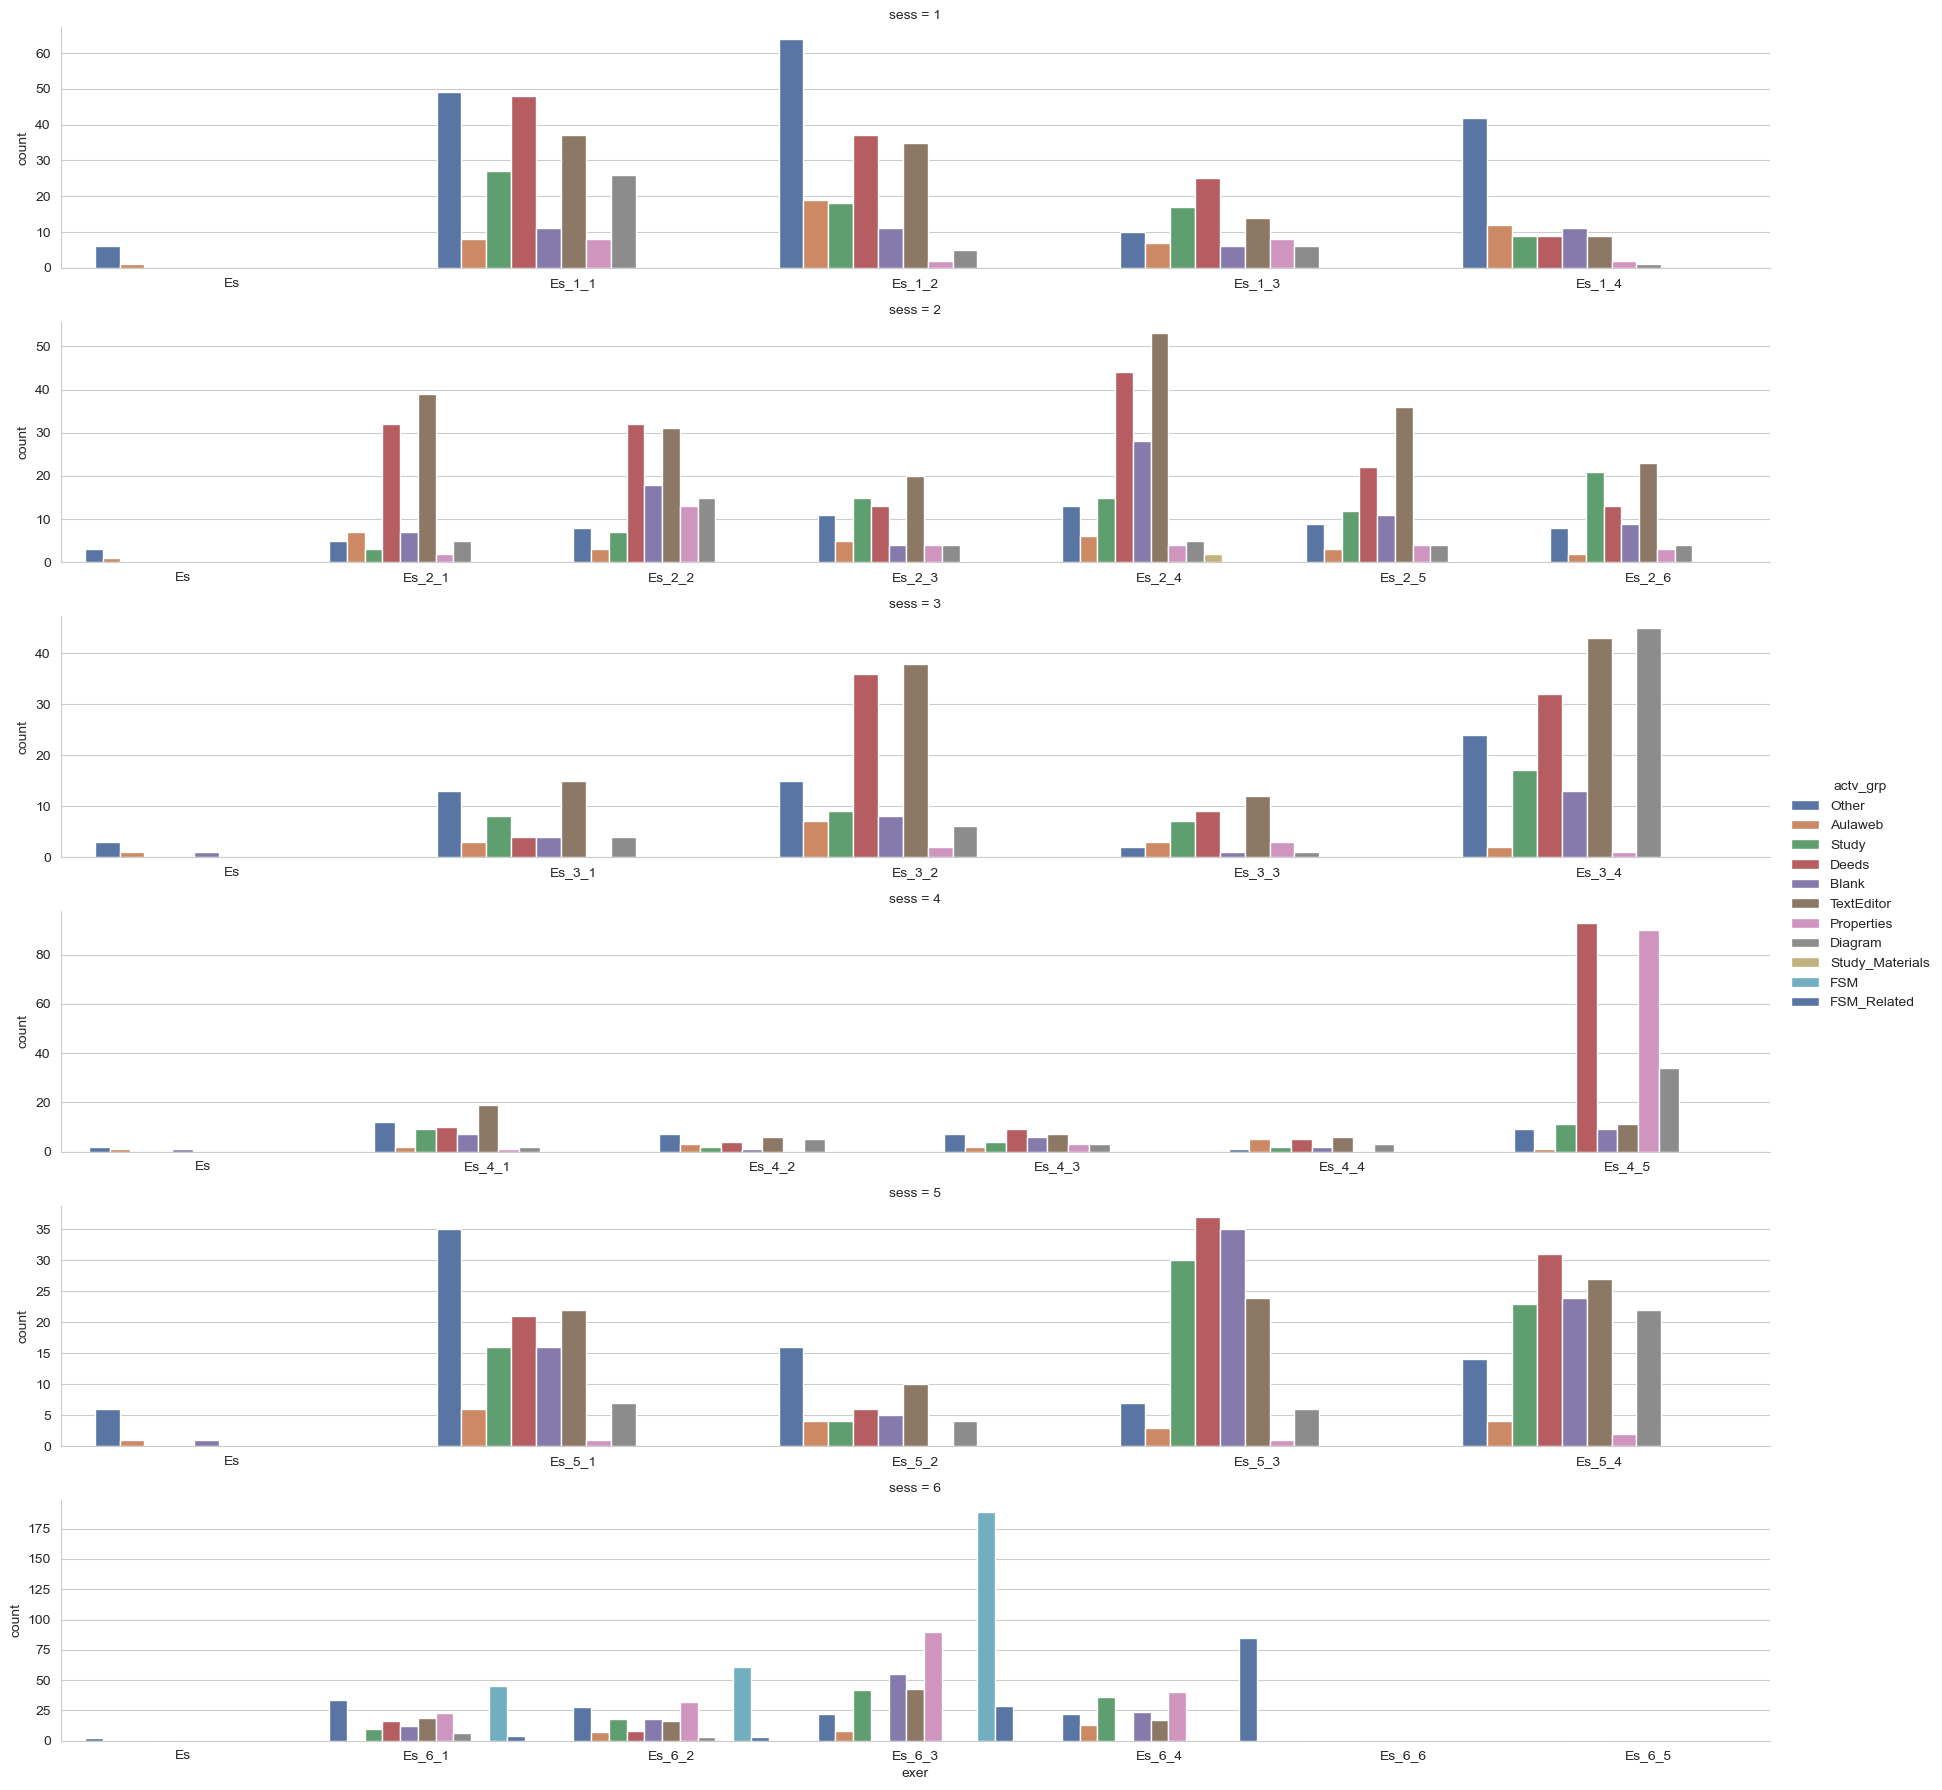

In [40]:
sns.set_style('whitegrid')

sns.catplot(data = inputs_df.loc[inputs_df['sid'] == 32], x='exer', col='sess', hue='actv_grp', 
            col_wrap=1, kind='count', palette='deep',
            height=3, aspect=6, sharey=False, sharex=False)

plt.show()

##### The bar chart below illustrates how student 32 progressses through the sessions (`sess`) by activity type (`actv_grp`).

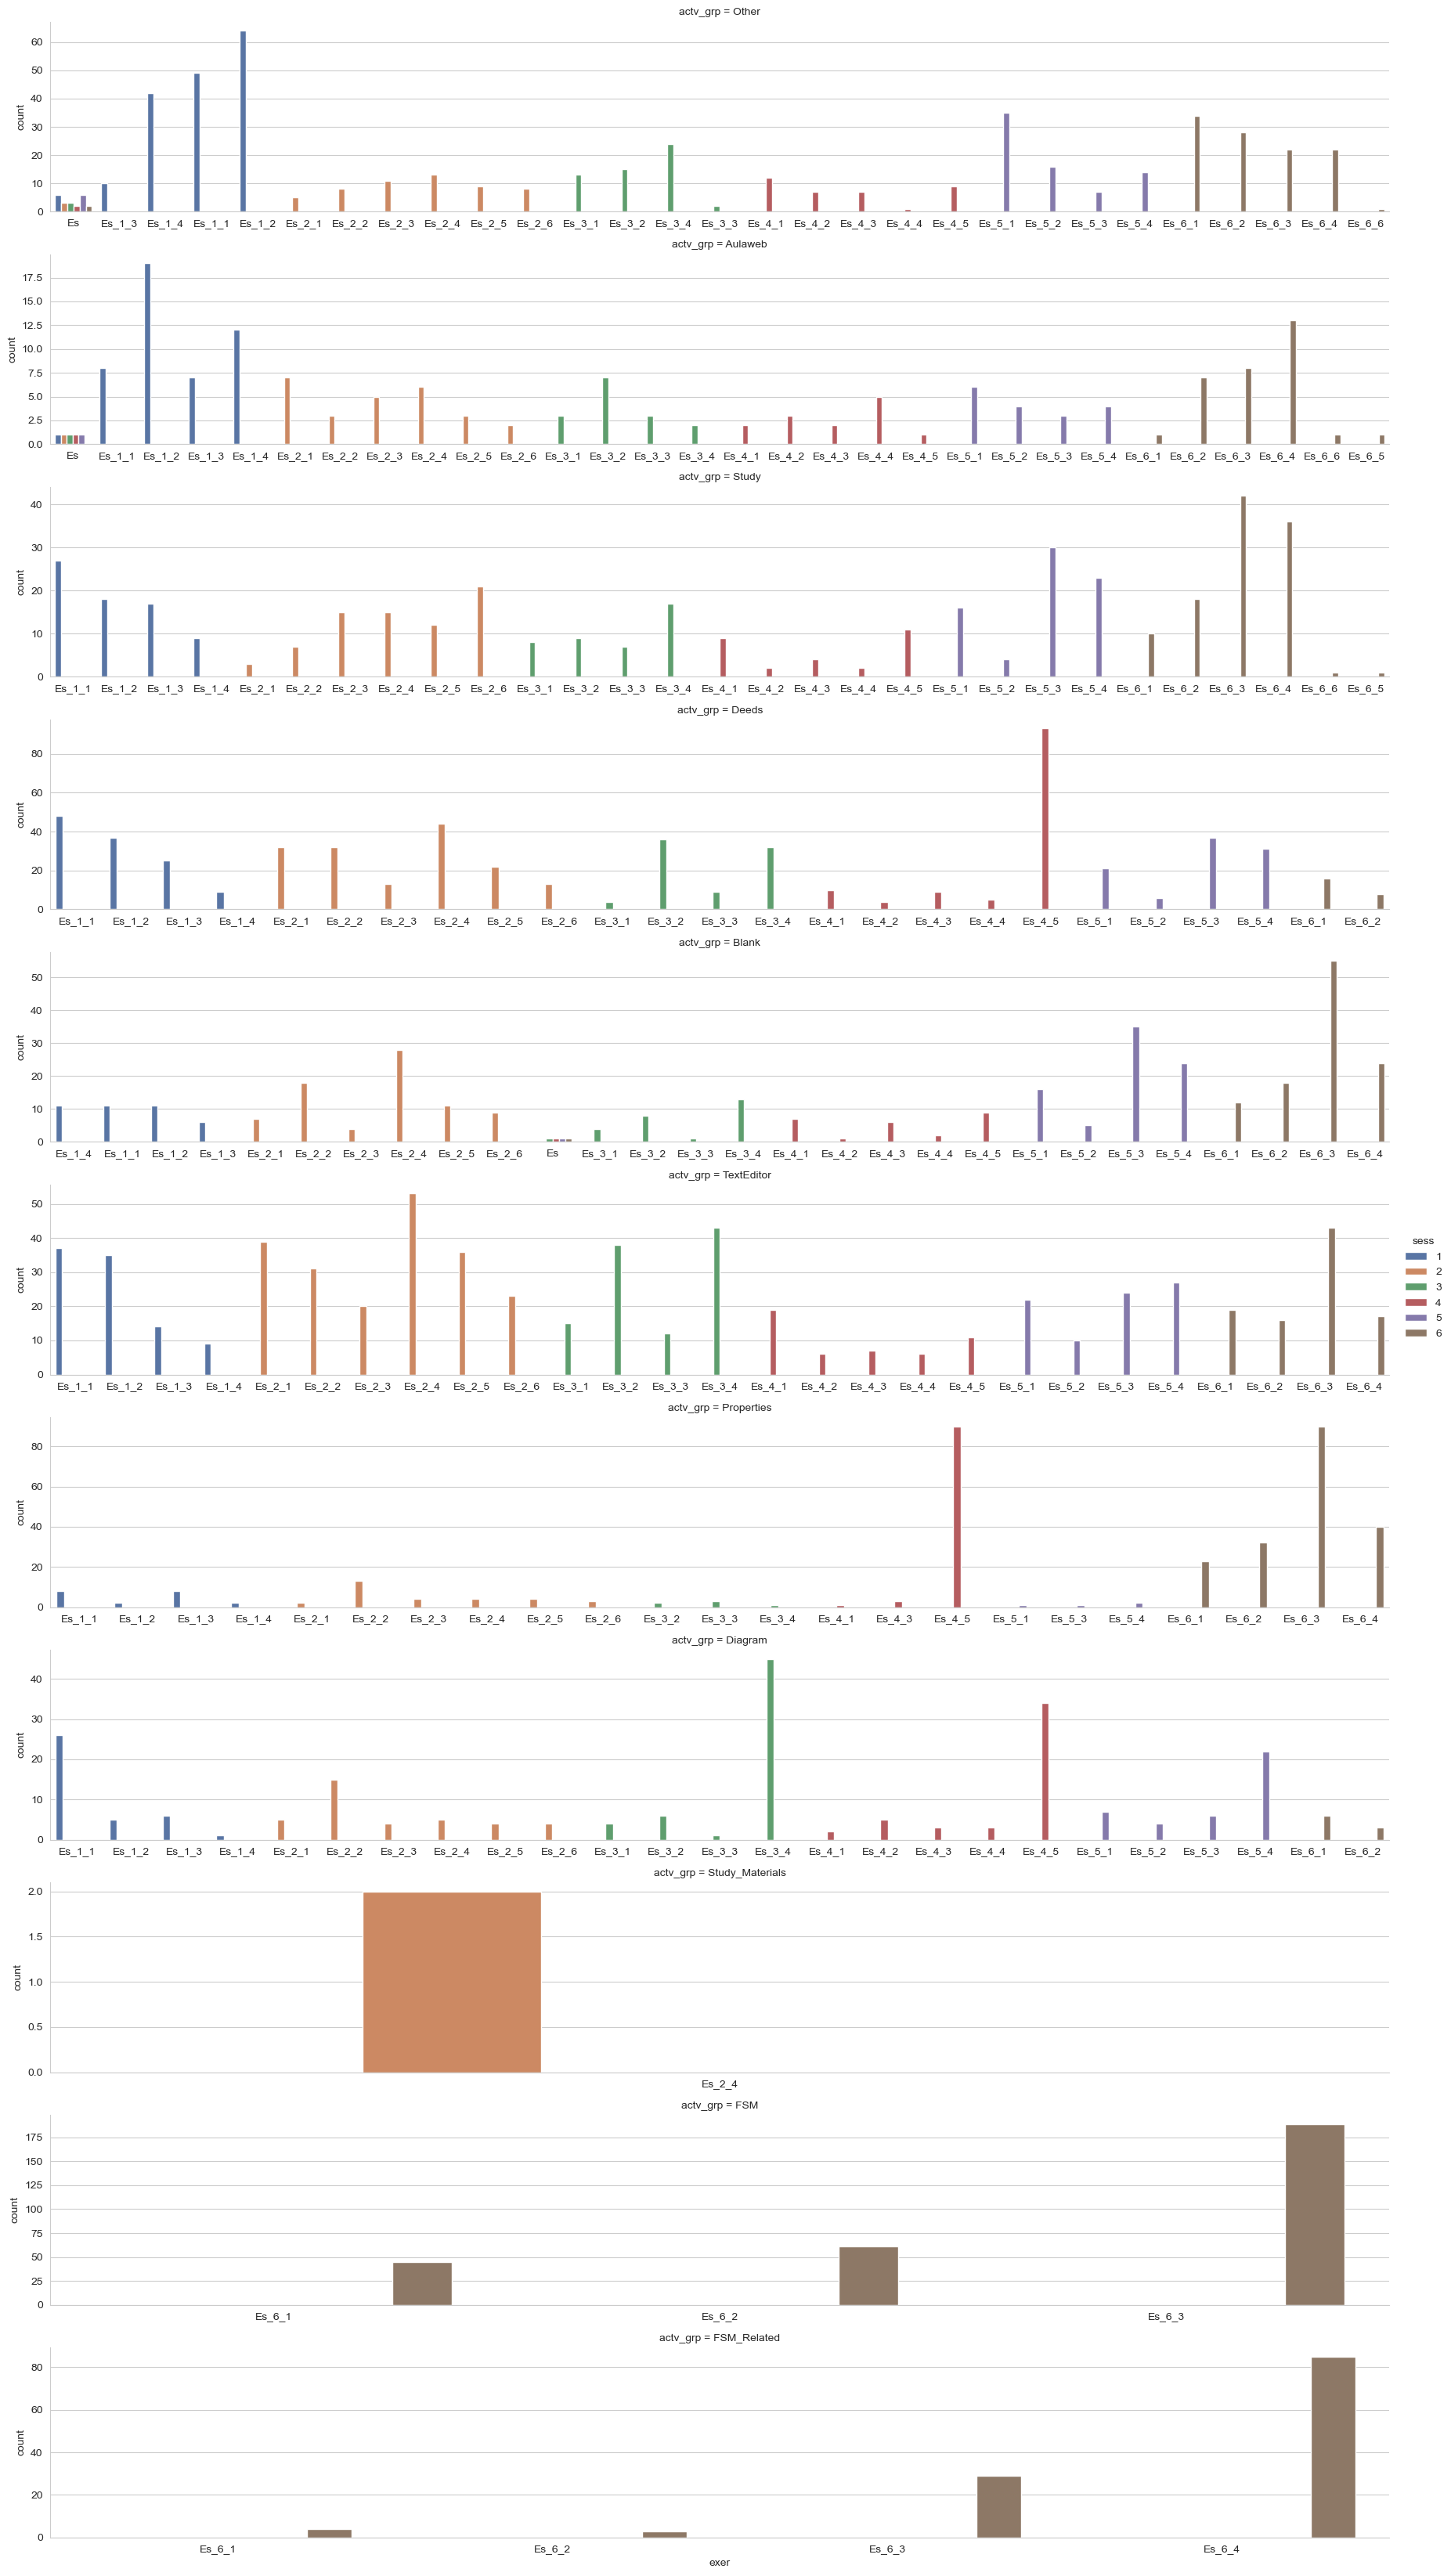

In [41]:
sns.set_style('whitegrid')

sns.catplot(data = inputs_df.loc[inputs_df['sid'] == 32], x='exer', col='actv_grp', hue='sess', 
            col_wrap=1, kind='count', palette='deep',
            height=3, aspect=6, sharey=False, sharex=False)

plt.show()

In [42]:
inputs_df.loc[inputs_df['sid'].isin([32, 44, 85])]

sess sid             start_dt               end_dt    exer  \
7807      1  32  2014-02-10 11:24:18  2014-02-10 11:24:22      Es   
7808      1  32  2014-02-10 11:24:23  2014-02-10 11:24:23      Es   
7809      1  32  2014-02-10 11:24:24  2014-02-10 11:24:24      Es   
7810      1  32  2014-02-10 11:24:25  2014-02-10 11:24:46      Es   
7811      1  32  2014-02-10 11:24:47  2014-02-10 11:24:49      Es   
...     ...  ..                  ...                  ...     ...   
218288    6  85  2014-11-12 13:55:44  2014-11-12 13:55:45  Es_6_6   
218289    6  85  2014-11-12 13:55:46  2014-11-12 13:55:58  Es_6_6   
218290    6  85  2014-11-12 13:55:59  2014-11-12 13:55:59  Es_6_6   
218291    6  85  2014-11-12 13:56:00  2014-11-12 13:56:04  Es_6_6   
218292    6  85  2014-11-12 13:56:05  2014-11-12 13:56:08  Es_6_6   

                actv actv_grp  total_ms   idle_ms  mw  ...  mm_wdz  ks_wdz  \
7807           Other    Other    4000.0    4242.0   0  ...    79.0     0.0   
7808           Other    Other       0.0       0.0   0  ...    43.0     0.0   
7809           Other    Other       0.0       0.0   0  ...    58.0     0.0   
7810           Other    Other   21000.0  185772.0   0  ...    82.0     0.0   
7811           Other    Other    2000.0      94.0   0  ...   194.0     0.0   
...              ...      ...       ...       ...  ..  ...     ...     ...   
218288         Other    Other    1000.0     124.0   0  ...    90.0     0.0   
218289  Study_Es_6_6    Study   12000.0   19722.0   0  ...   217.0     0.0   
218290         Blank    Blank       0.0       0.0   0  ...    61.0     0.0   
218291       Aulaweb  Aulaweb    4000.0       0.0   0  ...   193.0     0.0   
218292       Aulaweb  Aulaweb    3000.0       0.0   0  ...    98.0     0.0   

        total_ms_sqrt  idle_ms_sqrt  mw_sqrt  mwc_sqrt  mcl_sqrt  mcr_sqrt  \
7807        63.245553     65.130638      0.0       0.0  0.000000       0.0   
7808         0.000000      0.000000      0.0       0.0  1.414214       0.0   
7809         0.000000      0.000000      0.0       0.0  1.414214       0.0   
7810       144.913767    431.012761      0.0       0.0  1.414214       0.0   
7811        44.721360      9.695360      0.0       0.0  1.414214       0.0   
...               ...           ...      ...       ...       ...       ...   
218288      31.622777     11.135529      0.0       0.0  1.414214       0.0   
218289     109.544512    140.435038      0.0       0.0  2.000000       0.0   
218290       0.000000      0.000000      0.0       0.0  1.414214       0.0   
218291      63.245553      0.000000      0.0       0.0  2.000000       0.0   
218292      54.772256      0.000000      0.0       0.0  0.000000       0.0   

          mm_sqrt  ks_sqrt  
7807     8.888194      0.0  
7808     6.557439      0.0  
7809     7.615773      0.0  
7810     9.055385      0.0  
7811    13.928388      0.0  
...           ...      ...  
218288   9.486833      0.0  
218289  14.730920      0.0  
218290   7.810250      0.0  
218291  13.892444      0.0  
218292   9.899495      0.0  

[9806 rows x 31 columns]

##### The bar chart below illustrates how students 32, 44, and 85 progress through the activities (`actv`), which is the combined exercise and activity type, by session.

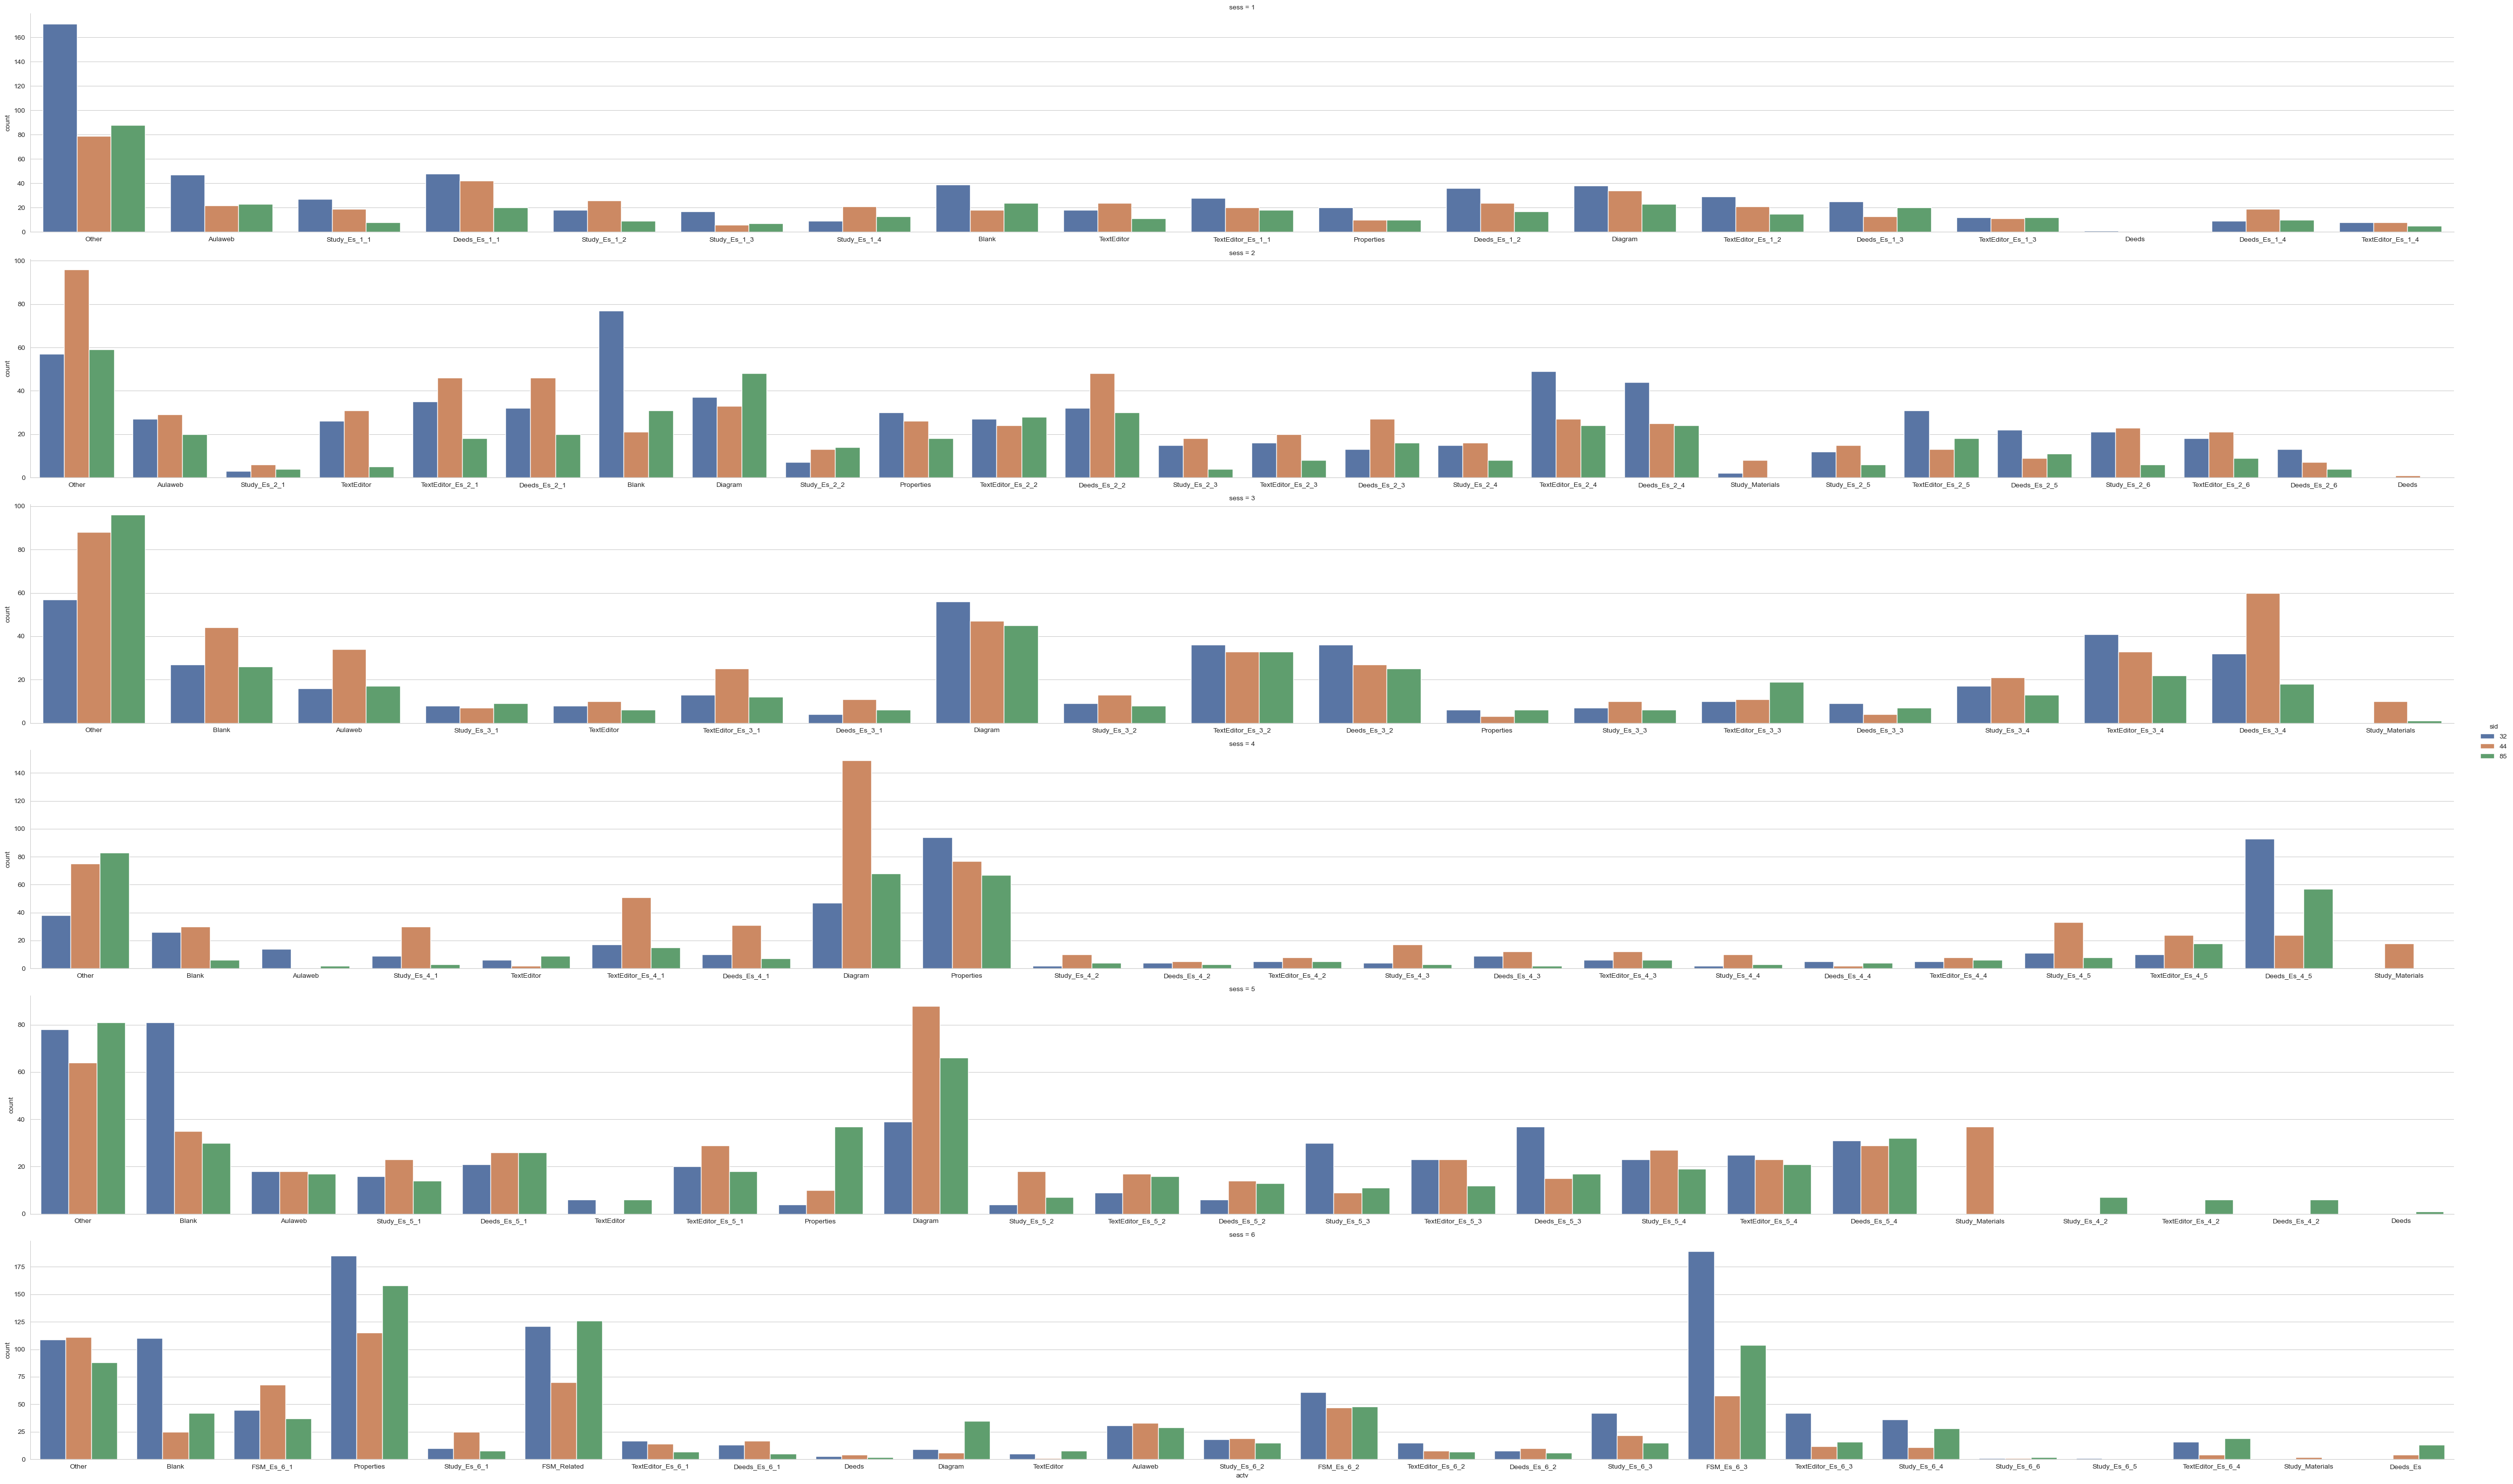

In [43]:
sns.set_style('whitegrid')

sns.catplot(data = inputs_df.loc[inputs_df['sid'].isin([32, 44, 85])], x='actv', col='sess', hue='sid', 
            col_wrap=1, kind='count', palette='deep',
            height=5, aspect=10, sharey=False, sharex=False)

plt.show()

#### Select 3 students with high participation and 3 students with low participation for heatmaps

In [44]:
sid_counts.loc[sid_counts['actv_uniq'] == max(sid_counts['actv_uniq'])]

sid  sess_uniq  exer_uniq  actv_uniq  actv_grp_uniq
31   32          6         30         93             11
43   44          6         29         93             11
51   52          6         29         93             10
69   70          6         30         93             10
80   81          6         30         93             10
84   85          6         29         93             11
93   94          6         30         93             10

In [45]:
sid_counts.loc[sid_counts['actv_uniq'] <= np.quantile(sid_counts['actv_uniq'], 0.15)]

sid  sess_uniq  exer_uniq  actv_uniq  actv_grp_uniq
25    26          1          6          9              5
32    33          1          6         20              8
56    57          2         10         30             10
57    58          1          6         16              6
61    62          2         10         34              8
76    77          1          6         16              6
88    89          4         12         28              9
102  103          2         10         34              9
104  105          2         11         26              8
105  106          1          5         19              9
106  108          1          5         22              9
107  109          1          5         20              8
108  110          1          5         18              8
109  111          1          5         20              9
110  112          1          5         19              8
111  113          1          5         19              8
112  114          1          5         19              8

In [46]:
sid_counts.loc[sid_counts['actv_uniq'] == max(sid_counts['actv_uniq'])]

sid  sess_uniq  exer_uniq  actv_uniq  actv_grp_uniq
31   32          6         30         93             11
43   44          6         29         93             11
51   52          6         29         93             10
69   70          6         30         93             10
80   81          6         30         93             10
84   85          6         29         93             11
93   94          6         30         93             10

#### Aggregate by student and session to count the number of unique values of `exer`, `actv`, and `actv_grp` for each student and session

In [47]:
sid_sess_counts = inputs_df.groupby(['sid', 'sess']).\
            aggregate(exer_uniq = ('exer', 'nunique'),
                      actv_uniq = ('actv', 'nunique'),
                      actv_grp_uniq = ('actv_grp', 'nunique')).\
            reset_index().copy()

In [48]:
sid_sess_counts

sid  sess  exer_uniq  actv_uniq  actv_grp_uniq
0      1     1          5         20              8
1      1     2          7         25              8
2      1     4          6         23              9
3      1     5          5         18              8
4      1     6          4         18             10
..   ...   ...        ...        ...            ...
509  110     1          5         18              8
510  111     1          5         20              9
511  112     1          5         19              8
512  113     1          5         19              8
513  114     1          5         19              8

[514 rows x 5 columns]

In [49]:
sid_sess_counts.loc[ (sid_sess_counts.sid.isin([32, 44, 85]))]

sid  sess  exer_uniq  actv_uniq  actv_grp_uniq
152   32     1          5         19              8
153   32     2          7         25              9
154   32     3          5         18              8
155   32     4          6         21              8
156   32     5          5         18              8
157   32     6          7         23             10
208   44     1          5         18              8
209   44     2          7         26              9
210   44     3          5         19              9
211   44     4          6         21              8
212   44     5          5         18              9
213   44     6          6         24             11
404   85     1          5         18              8
405   85     2          7         24              8
406   85     3          5         19              9
407   85     4          6         21              8
408   85     5          6         22              8
409   85     6          6         23             10

In [50]:
sid_sess_counts.loc[ (sid_sess_counts.sid.isin([57, 77, 89]))]

sid  sess  exer_uniq  actv_uniq  actv_grp_uniq
277   57     4          6         16              6
278   57     6          5         20             10
365   77     4          6         16              6
428   89     3          4         11              7
429   89     4          6         17              7
430   89     5          2          6              5
431   89     6          3         10              8

In [51]:
uniq_vars = get_var_list(sid_sess_counts,['uniq'])

In [52]:
sid_3high_sess_counts = sid_sess_counts.loc[sid_sess_counts.sid.isin([32, 44, 85])].copy()

In [53]:
sid_3high_sess_counts.head()

sid  sess  exer_uniq  actv_uniq  actv_grp_uniq
152   32     1          5         19              8
153   32     2          7         25              9
154   32     3          5         18              8
155   32     4          6         21              8
156   32     5          5         18              8

In [54]:
the_sessions = sid_3high_sess_counts.sess.unique().tolist()

In [55]:
sid_3high_sess_counts.reset_index()[['sid','sess', uniq_vars[0]]].pivot(index='sid', columns='sess', values=uniq_vars[0])

sess  1  2  3  4  5  6
sid                   
32    5  7  5  6  5  7
44    5  7  5  6  5  6
85    5  7  5  6  6  6

#### Heatmaps show participation as the unique count of exercises, activities, and activity groups for the selected students with high and low participation

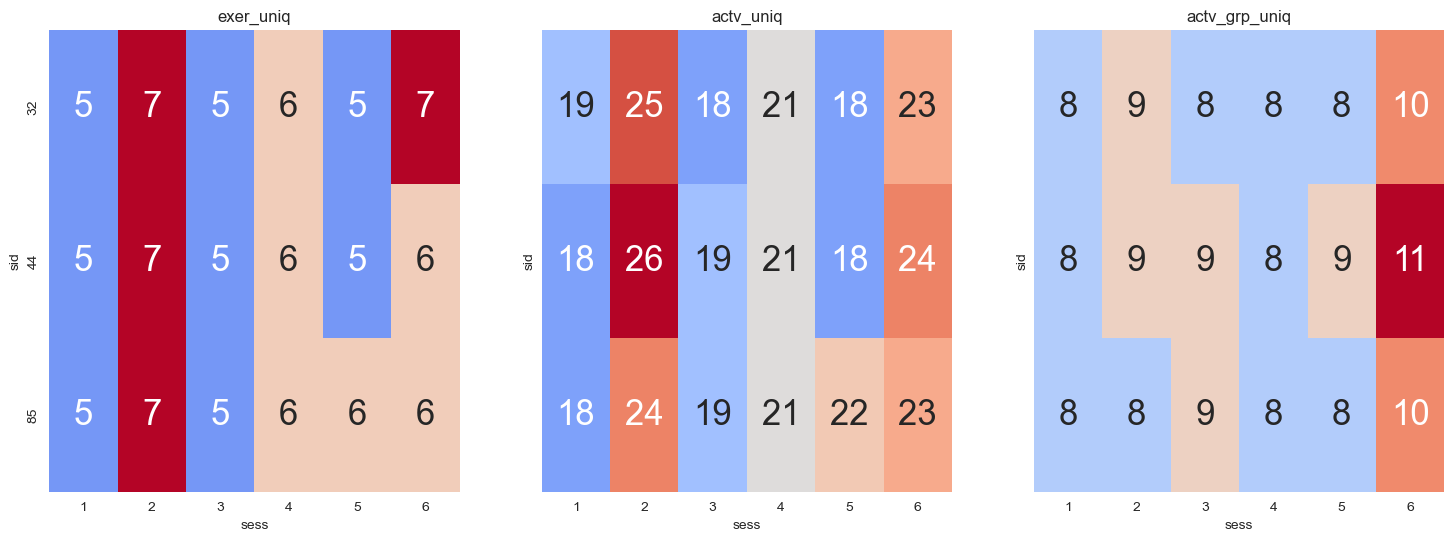

In [56]:
fig, axs = plt.subplots(1, len(uniq_vars), figsize=(18,6), sharex=True, sharey=True)

for ix, x in enumerate(uniq_vars):
    sns.heatmap(data = sid_3high_sess_counts.reset_index()[['sid','sess', x]].pivot(index='sid', columns='sess', values=x),
                center=sid_3high_sess_counts.reset_index()[x].mean(),
                cmap='coolwarm', cbar=False,
                annot=True, annot_kws={'size': 25},
                ax=axs[ix])
    
    axs[ix].set_title(str(x))

plt.show()

In [57]:
sid_sess_counts.loc[ (sid_sess_counts.sid.isin([57, 77, 89]))]

sid  sess  exer_uniq  actv_uniq  actv_grp_uniq
277   57     4          6         16              6
278   57     6          5         20             10
365   77     4          6         16              6
428   89     3          4         11              7
429   89     4          6         17              7
430   89     5          2          6              5
431   89     6          3         10              8

In [58]:
sid_3low_sess_counts = sid_sess_counts.loc[sid_sess_counts.sid.isin([57, 77, 89])].copy()

In [59]:
the_sessions_low = sid_3low_sess_counts.sess.unique().tolist()

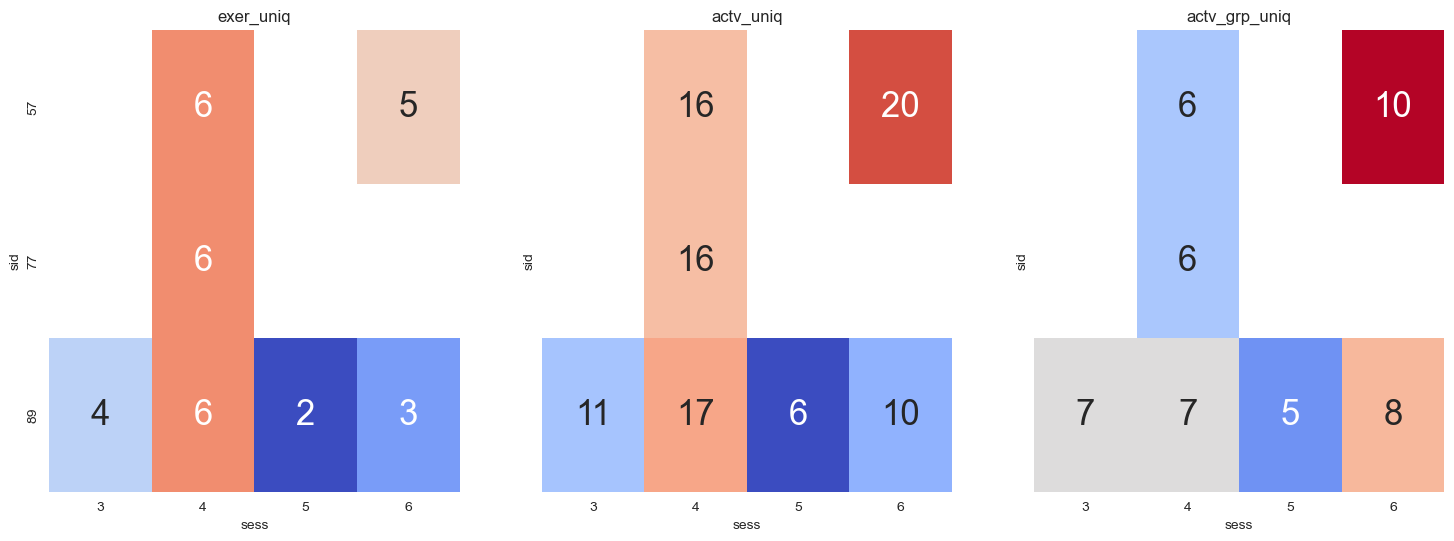

In [60]:
fig, axs = plt.subplots(1, len(uniq_vars), figsize=(18,6), sharex=True, sharey=True)

for ix, x in enumerate(uniq_vars):
    sns.heatmap(data = sid_3low_sess_counts.reset_index()[['sid','sess', x]].pivot(index='sid', columns='sess', values=x),
                center=sid_3low_sess_counts.reset_index()[x].mean(),
                cmap='coolwarm', cbar=False,
                annot=True, annot_kws={'size': 25},
                ax=axs[ix])
    
    axs[ix].set_title(str(x))

plt.show()

#### The distribution of numeric variables (sqrt) by activity group and session

In [61]:
inputs_sqrt_df = inputs_df[cat_vars + sqrt_vars].copy()

In [62]:
inputs_sqrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227129 entries, 0 to 227128
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sess           227129 non-null  object 
 1   sid            227129 non-null  object 
 2   exer           227129 non-null  object 
 3   actv_grp       227129 non-null  object 
 4   total_ms_sqrt  227128 non-null  float64
 5   idle_ms_sqrt   226971 non-null  float64
 6   mw_sqrt        227129 non-null  float64
 7   mwc_sqrt       227129 non-null  float64
 8   mcl_sqrt       227129 non-null  float64
 9   mcr_sqrt       227129 non-null  float64
 10  mm_sqrt        227129 non-null  float64
 11  ks_sqrt        227129 non-null  float64
dtypes: float64(8), object(4)
memory usage: 20.8+ MB


In [63]:
inputs_sqrt_df.describe()

total_ms_sqrt   idle_ms_sqrt        mw_sqrt       mwc_sqrt  \
count  227128.000000  226971.000000  227129.000000  227129.000000   
mean       75.724962     221.136780       0.380204       0.002757   
std       100.630429    1046.482145       1.600802       0.073777   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%        44.721360       8.944272       0.000000       0.000000   
75%        94.868330      75.766087       0.000000       0.000000   
max      1964.942747   85116.014486      53.888774       7.745967   

            mcl_sqrt       mcr_sqrt        mm_sqrt        ks_sqrt  
count  227129.000000  227129.000000  227129.000000  227129.000000  
mean        1.994965       0.114958      15.115336       0.661013  
std         1.759565       0.568873      13.643873       2.417640  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.414214       0.000000       7.874008       0.000000  
50%         1.414214       0.000000      11.704700       0.000000  
75%         2.236068       0.000000      18.303005       0.000000  
max        33.105891      12.961481     293.170599      68.949257

In [64]:
cat_vars

['sess', 'sid', 'exer', 'actv_grp']

In [65]:
inputs_sqrt_lf = inputs_sqrt_df.melt( id_vars=cat_vars, 
                  value_vars=sqrt_vars).copy()

In [66]:
inputs_sqrt_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817032 entries, 0 to 1817031
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   sess      object 
 1   sid       object 
 2   exer      object 
 3   actv_grp  object 
 4   variable  object 
 5   value     float64
dtypes: float64(1), object(5)
memory usage: 83.2+ MB


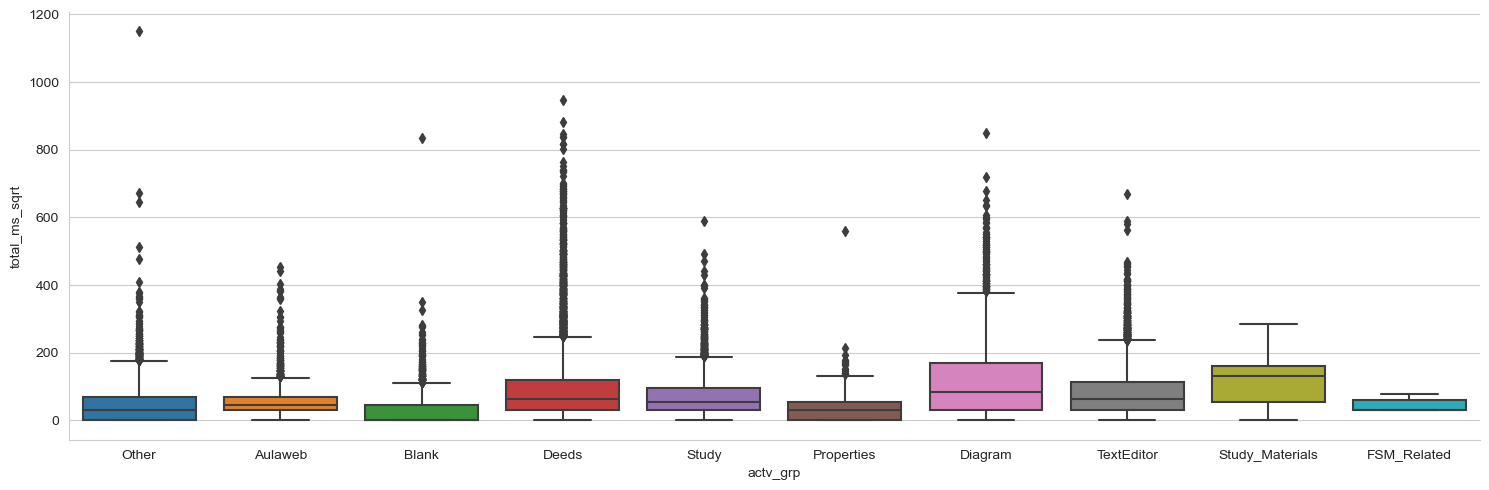

In [67]:
sns.catplot(data = inputs_sqrt_df.loc[inputs_sqrt_df.sess==1], x='actv_grp', y='total_ms_sqrt', kind='box', aspect=3)

plt.show()

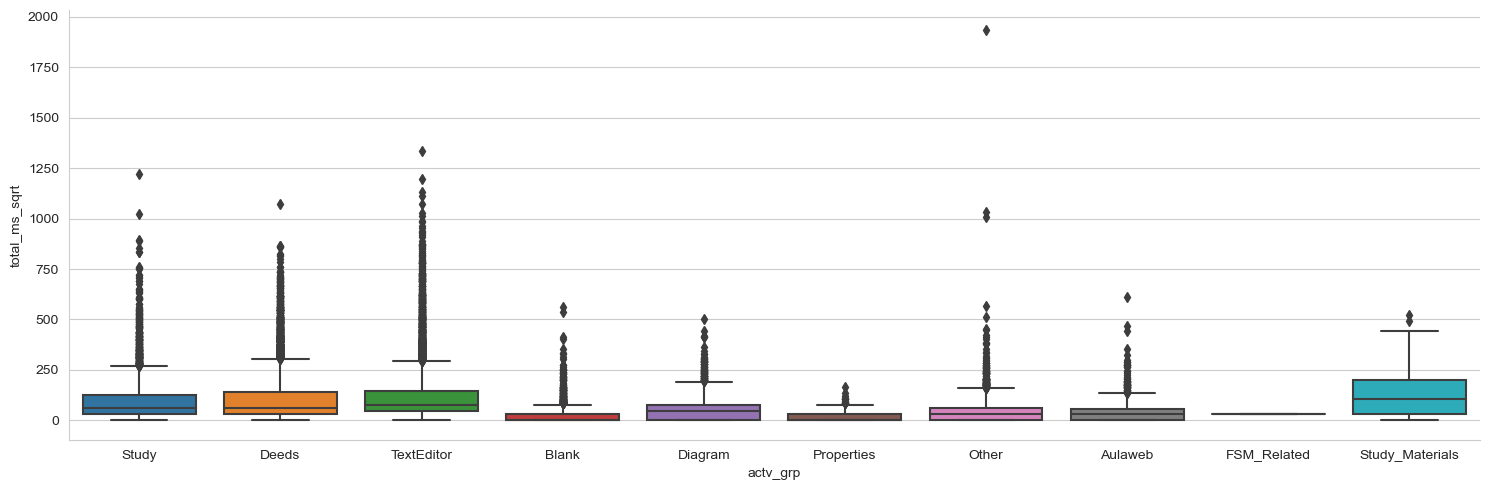

In [68]:
sns.catplot(data = inputs_sqrt_df.loc[inputs_sqrt_df.sess==2], x='actv_grp', y='total_ms_sqrt', kind='box', aspect=3)

plt.show()

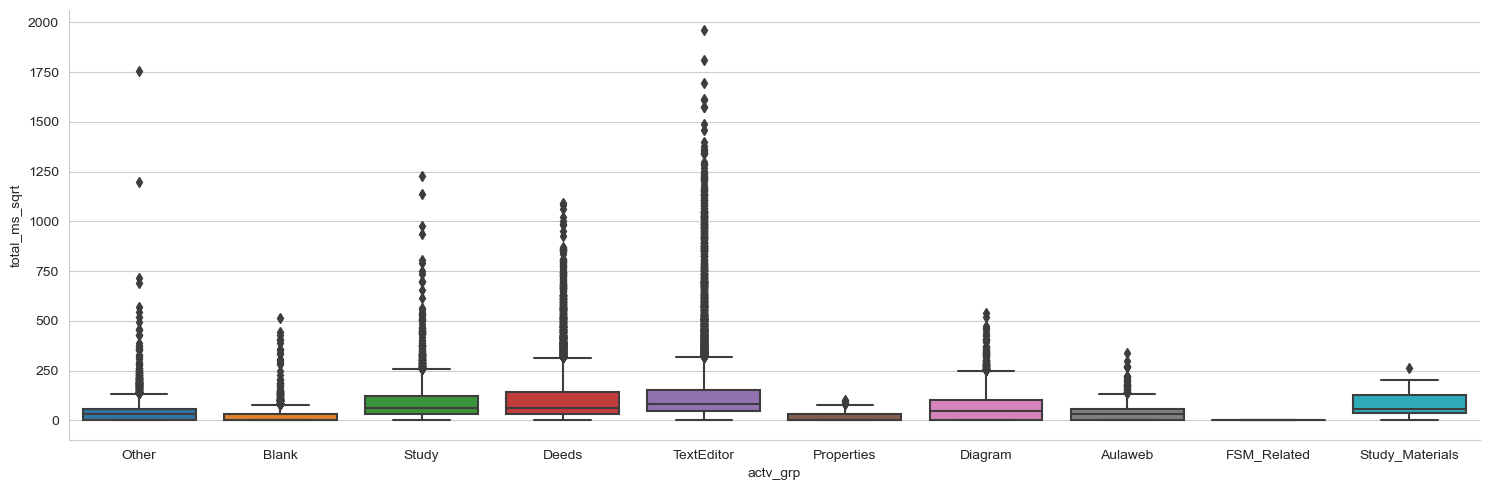

In [69]:
sns.catplot(data = inputs_sqrt_df.loc[inputs_sqrt_df.sess==3], x='actv_grp', y='total_ms_sqrt', kind='box', aspect=3)

plt.show()

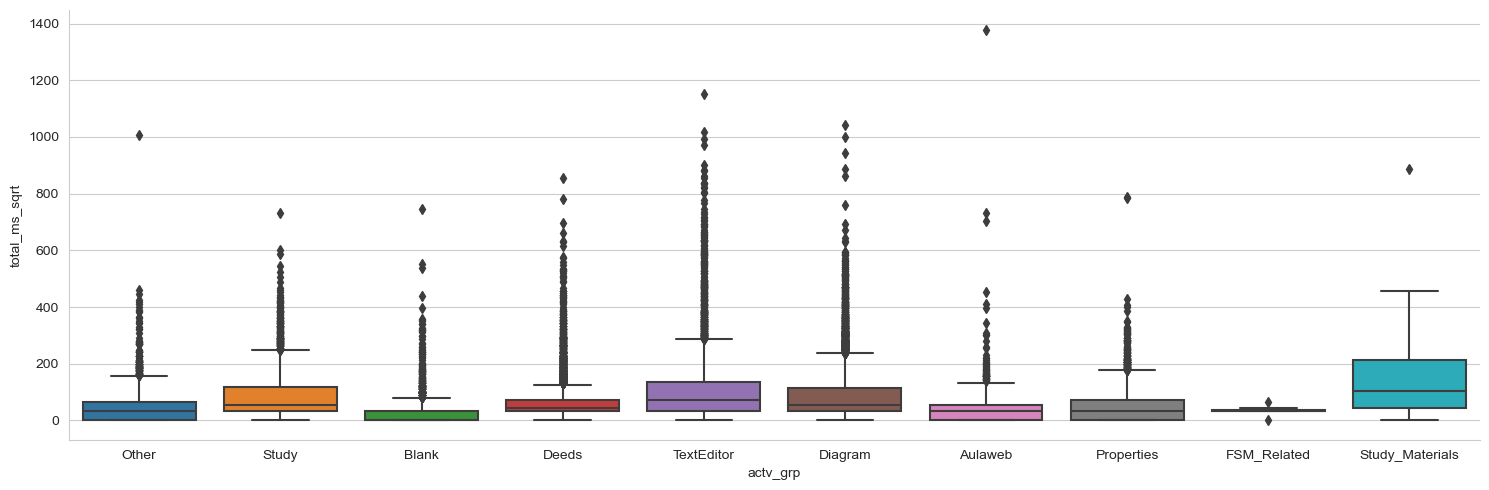

In [70]:
sns.catplot(data = inputs_sqrt_df.loc[inputs_sqrt_df.sess==4], x='actv_grp', y='total_ms_sqrt', kind='box', aspect=3)

plt.show()

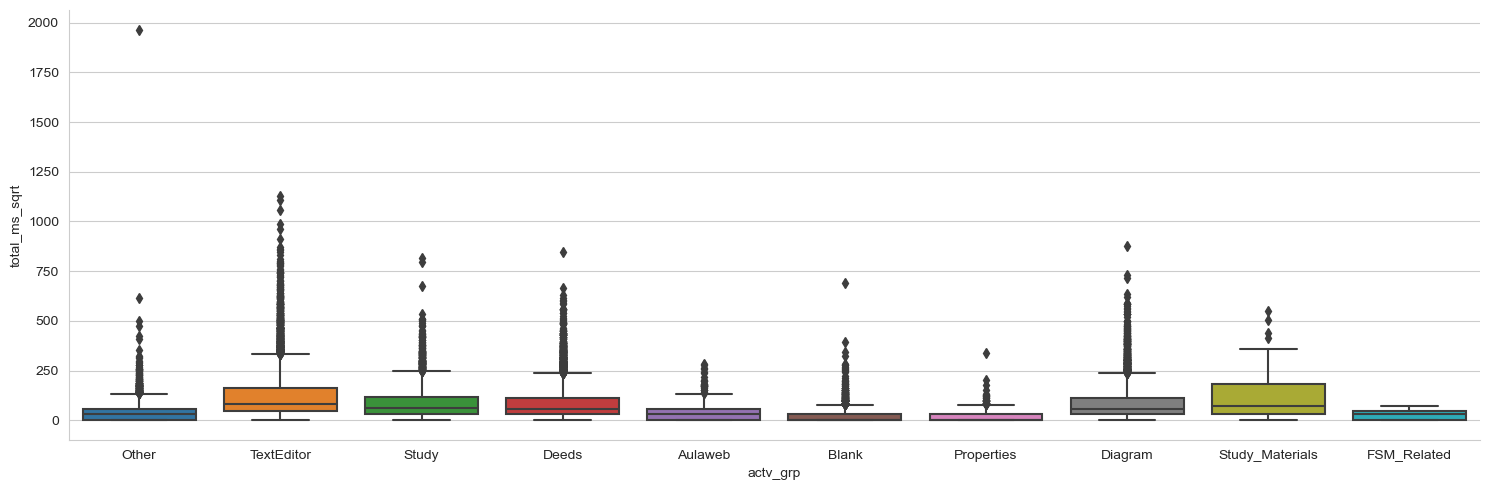

In [71]:
sns.catplot(data = inputs_sqrt_df.loc[inputs_sqrt_df.sess==5], x='actv_grp', y='total_ms_sqrt', kind='box', aspect=3)

plt.show()

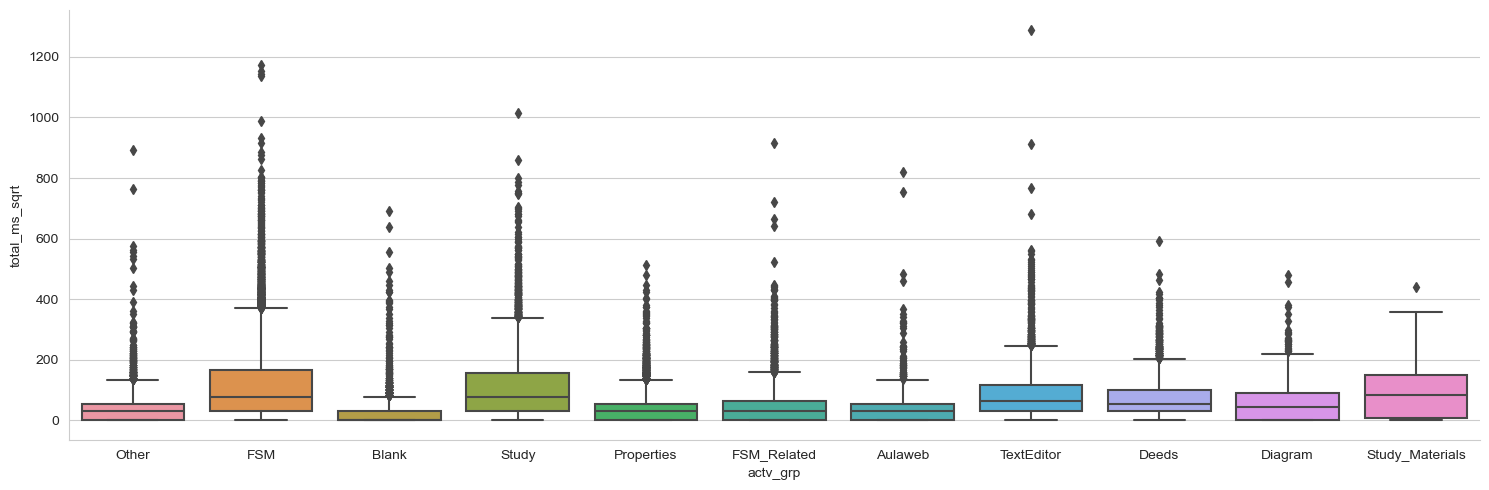

In [72]:
sns.catplot(data = inputs_sqrt_df.loc[inputs_sqrt_df.sess==6], x='actv_grp', y='total_ms_sqrt', kind='box', aspect=3)

plt.show()

#### Correlation
The numeric inputs are highly correlated.

In [73]:
inputs_sqrt_df.loc[:, sqrt_vars].corr()

total_ms_sqrt  idle_ms_sqrt   mw_sqrt  mwc_sqrt  mcl_sqrt  \
total_ms_sqrt       1.000000      0.772576  0.349806  0.032966  0.674365   
idle_ms_sqrt        0.772576      1.000000  0.282011  0.023932  0.439299   
mw_sqrt             0.349806      0.282011  1.000000  0.050244  0.212130   
mwc_sqrt            0.032966      0.023932  0.050244  1.000000  0.007407   
mcl_sqrt            0.674365      0.439299  0.212130  0.007407  1.000000   
mcr_sqrt            0.308610      0.166843  0.040273  0.013707  0.432783   
mm_sqrt             0.738497      0.450366  0.332769  0.038157  0.803341   
ks_sqrt             0.520151      0.442888  0.302601  0.003945  0.358556   

               mcr_sqrt   mm_sqrt   ks_sqrt  
total_ms_sqrt  0.308610  0.738497  0.520151  
idle_ms_sqrt   0.166843  0.450366  0.442888  
mw_sqrt        0.040273  0.332769  0.302601  
mwc_sqrt       0.013707  0.038157  0.003945  
mcl_sqrt       0.432783  0.803341  0.358556  
mcr_sqrt       1.000000  0.390619  0.075800  
mm_sqrt        0.390619  1.000000  0.364175  
ks_sqrt        0.075800  0.364175  1.000000

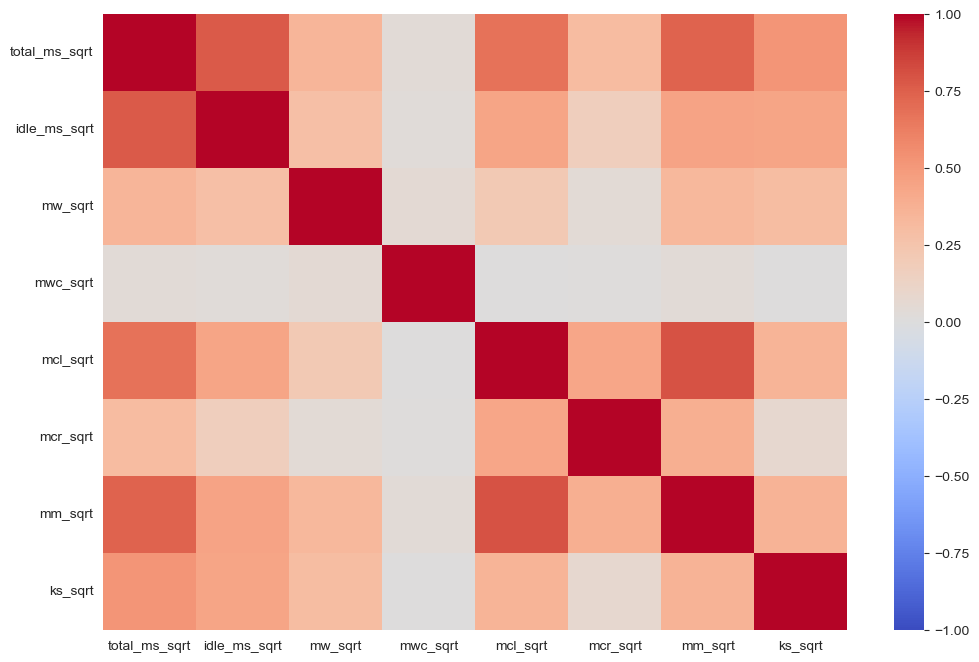

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data = inputs_sqrt_df.loc[:, sqrt_vars].corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax)

plt.show()

## Explore the intermediate output data
The histograms show the distribution of intermediate scores for each session.

In [75]:
interim_df = interim_init.copy()

In [76]:
interim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sid           115 non-null    int64  
 1   interim_scr2  115 non-null    float64
 2   interim_scr3  115 non-null    float64
 3   interim_scr4  115 non-null    float64
 4   interim_scr5  115 non-null    float64
 5   interim_scr6  115 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [77]:
interim_df

sid  interim_scr2  interim_scr3  interim_scr4  interim_scr5  interim_scr6
0      1           5.0           0.0           4.5           4.0          2.25
1      2           4.0           3.5           4.5           4.0          1.00
2      3           3.5           3.5           4.5           4.0          0.00
3      4           6.0           4.0           5.0           3.5          2.75
4      5           5.0           4.0           5.0           4.0          2.75
..   ...           ...           ...           ...           ...           ...
110  111           3.0           0.0           0.0           3.0          0.00
111  112           0.0           0.0           0.0           0.0          0.00
112  113           0.0           0.0           0.0           0.0          0.00
113  114           0.0           0.0           0.0           0.0          0.00
114  115           0.0           0.0           0.0           0.0          0.00

[115 rows x 6 columns]

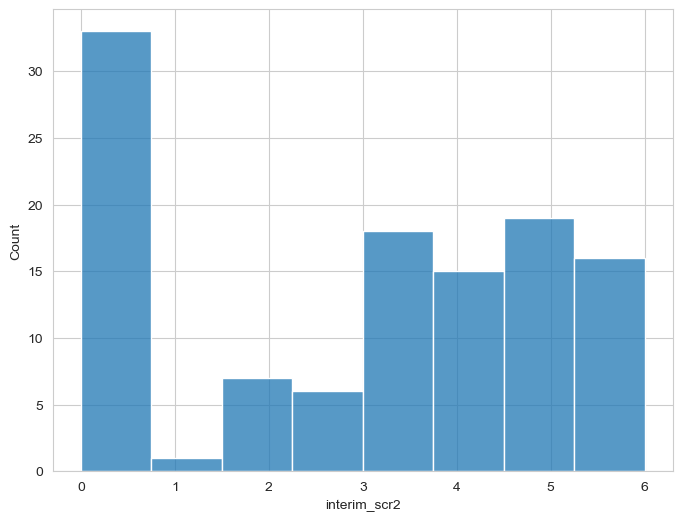

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=interim_df, x='interim_scr2', ax=ax)

plt.show()

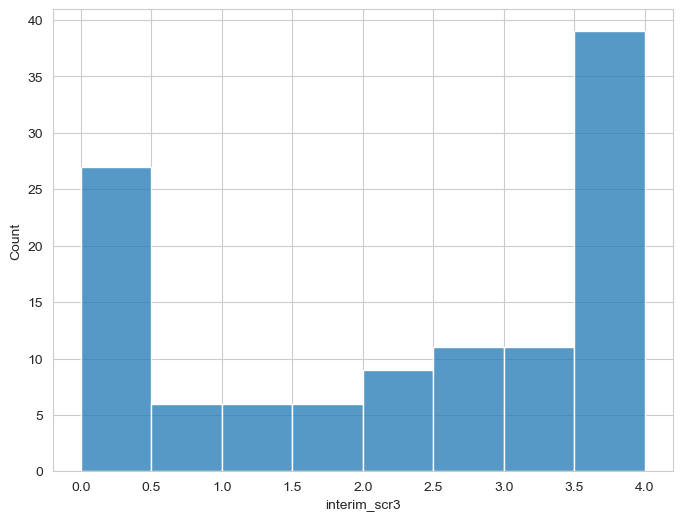

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=interim_df, x='interim_scr3', ax=ax)

plt.show()

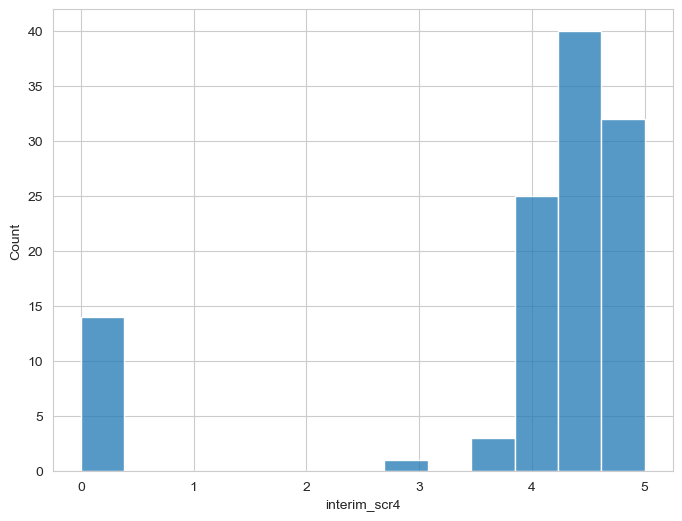

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=interim_df, x='interim_scr4', ax=ax)

plt.show()

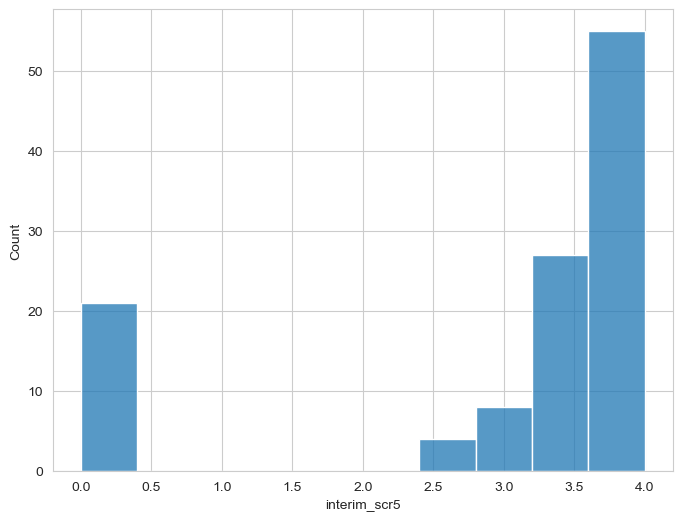

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=interim_df, x='interim_scr5', ax=ax)

plt.show()

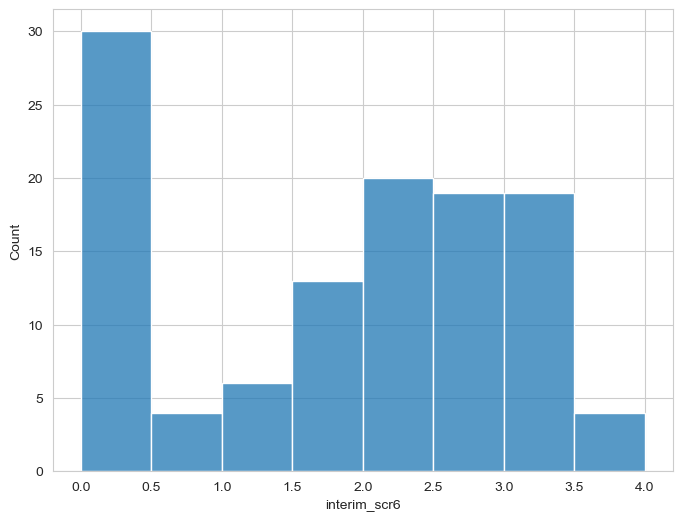

In [82]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=interim_df, x='interim_scr6', ax=ax)

plt.show()

#### Create a long format intermediate score dataset

In [83]:
interim_lf = interim_df.melt( id_vars=['sid']).\
             rename(columns={"variable": "interim_session", "value": "interim_score"}).\
             copy()

In [84]:
interim_lf['sess'] = interim_lf.interim_session.str.extract('(\d+)')

In [85]:
interim_lf['sess'] = [x.strip() for x in interim_lf.sess]

In [86]:
interim_lf['sess'] = interim_lf['sess'].astype('int')

In [87]:
interim_lf

sid interim_session  interim_score  sess
0      1    interim_scr2            5.0     2
1      2    interim_scr2            4.0     2
2      3    interim_scr2            3.5     2
3      4    interim_scr2            6.0     2
4      5    interim_scr2            5.0     2
..   ...             ...            ...   ...
570  111    interim_scr6            0.0     6
571  112    interim_scr6            0.0     6
572  113    interim_scr6            0.0     6
573  114    interim_scr6            0.0     6
574  115    interim_scr6            0.0     6

[575 rows x 4 columns]

In [88]:
interim_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sid              575 non-null    int64  
 1   interim_session  575 non-null    object 
 2   interim_score    575 non-null    float64
 3   sess             575 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 18.1+ KB


## Explore the final output data
The histogram shows the distribution of final exam scores, and the bar chart shows the distribution of scores as pass/fail where passing the exam was defined as earning 70% or greater on the composite.  

In [89]:
final_df = final_init.copy()

In [90]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sid          62 non-null     int64  
 1   Es_1q1       62 non-null     float64
 2   Es_1q2       62 non-null     float64
 3   Es_2q1       62 non-null     float64
 4   Es_2q2       62 non-null     float64
 5   Es_3q1       62 non-null     float64
 6   Es_3q2       62 non-null     float64
 7   Es_3q3       62 non-null     float64
 8   Es_3q4       62 non-null     float64
 9   Es_3q5       62 non-null     float64
 10  Es_4q1       62 non-null     float64
 11  Es_4q2       62 non-null     float64
 12  Es_5q1       62 non-null     float64
 13  Es_5q2       62 non-null     float64
 14  Es_5q3       62 non-null     float64
 15  Es_6q1       62 non-null     float64
 16  Es_6q2       62 non-null     float64
 17  final_score  62 non-null     float64
 18  pass         62 non-null     int64  
dtypes: float64

In [91]:
pts_final_lookup.columns

Index(['question', 'question_points'], dtype='object')

In [92]:
pts_final = pts_final_lookup[['question', 'question_points']].copy()

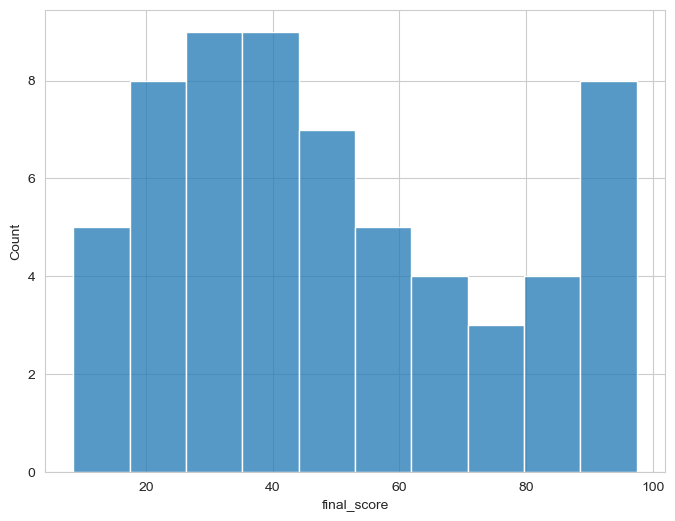

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=final_df, x='final_score', ax=ax, bins=10)

plt.show()

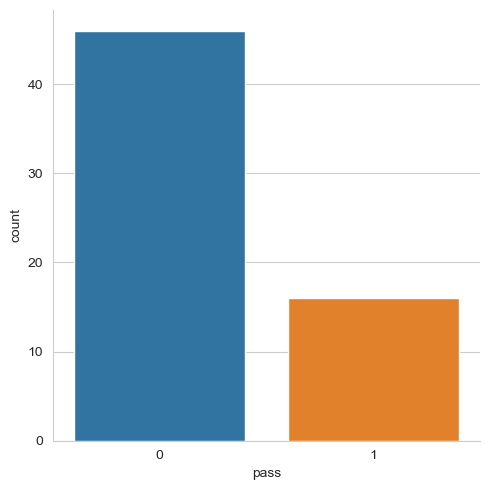

In [94]:
sns.catplot(data = final_df, x='pass', kind='count')

plt.show()

In [95]:
final_df['pass'].mean()

0.25806451612903225

#### Look at scores for each question of the question score by student

In [96]:
final_lf = final_df.melt( id_vars=['sid', 'final_score', 'pass']).\
           rename(columns={"variable": "question", 
                           "value": "question_score"}).\
           copy()

In [97]:
final_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sid             992 non-null    int64  
 1   final_score     992 non-null    float64
 2   pass            992 non-null    int64  
 3   question        992 non-null    object 
 4   question_score  992 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 38.9+ KB


In [98]:
pts_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   question         17 non-null     object
 1   question_points  17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [99]:
final_comp_lf = pd.merge(final_lf, pts_final, on=['question']).copy()

In [100]:
final_comp_lf.sort_values(by=['sid'])

sid  final_score  pass question  question_score  question_points
0      1         94.5     1   Es_1q1             2.0                2
124    1         94.5     1   Es_2q1             1.0                2
806    1         94.5     1   Es_5q3             3.0                3
620    1         94.5     1   Es_4q2            10.0               10
868    1         94.5     1   Es_6q1            25.0               25
..   ...          ...   ...      ...             ...              ...
185  106         71.0     1   Es_2q1             1.0                2
123  106         71.0     1   Es_1q2             3.0                3
61   106         71.0     1   Es_1q1             2.0                2
929  106         71.0     1   Es_6q1            25.0               25
991  106         71.0     1   Es_6q2            10.0               15

[992 rows x 6 columns]

In [101]:
final_comp_lf['question_pct'] = final_comp_lf['question_score'] / final_comp_lf['question_points']

## Explore input unique counts and output data

#### Concatenate low and high participation student dataframes and join with `interim_lf`

In [102]:
high_counts_interim = pd.merge(interim_lf, sid_3high_sess_counts, on=['sid', 'sess'])

In [103]:
high_counts_interim.head()

sid interim_session  interim_score  sess  exer_uniq  actv_uniq  \
0   32    interim_scr2            5.5     2          7         25   
1   44    interim_scr2            5.5     2          7         26   
2   85    interim_scr2            6.0     2          7         24   
3   32    interim_scr3            4.0     3          5         18   
4   44    interim_scr3            4.0     3          5         19   

   actv_grp_uniq  
0              9  
1              9  
2              8  
3              8  
4              9

In [104]:
low_counts_interim = pd.merge(interim_lf, sid_3low_sess_counts, on=['sid', 'sess'])

In [105]:
low_counts_interim.head()

sid interim_session  interim_score  sess  exer_uniq  actv_uniq  \
0   89    interim_scr3            1.5     3          4         11   
1   57    interim_scr4            4.5     4          6         16   
2   77    interim_scr4            4.0     4          6         16   
3   89    interim_scr4            3.5     4          6         17   
4   89    interim_scr5            2.5     5          2          6   

   actv_grp_uniq  
0              7  
1              6  
2              6  
3              7  
4              5

In [106]:
var_list = uniq_vars + ['interim_score']

In [107]:
high_counts_interim.reset_index()[['sid','sess', var_list[0]]].pivot(index='sid', columns='sess', values=var_list[0])

sess  2  3  4  5  6
sid                
32    7  5  6  5  7
44    7  5  6  5  6
85    7  5  6  6  6

#### Heatmaps show participation and interim score for 3 low and 3 high participation students

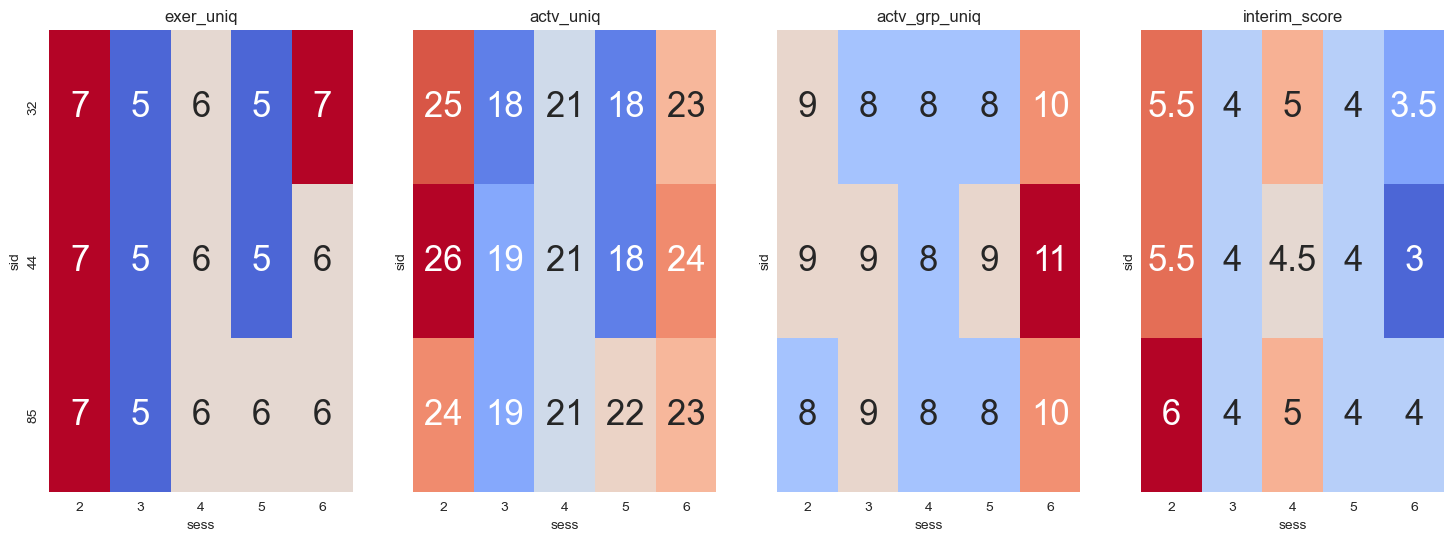

In [108]:
fig, axs = plt.subplots(1, len(var_list), figsize=(18,6), sharex=True, sharey=True)

for ix, x in enumerate(var_list):
    sns.heatmap(data = high_counts_interim.reset_index()[['sid','sess', x]].pivot(index='sid', columns='sess', values=x),
                center=high_counts_interim.reset_index()[x].mean(),
                cmap='coolwarm', cbar=False,
                annot=True, annot_kws={'size': 25},
                ax=axs[ix])
    
    axs[ix].set_title(x)

plt.show()

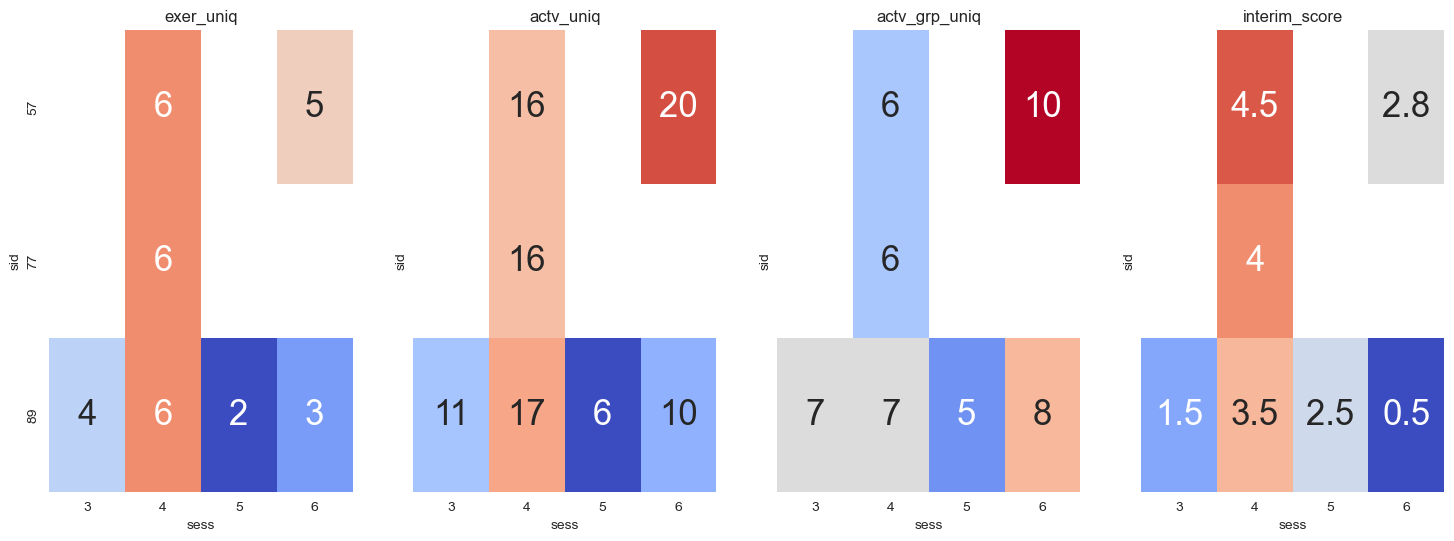

In [109]:
fig, axs = plt.subplots(1, len(var_list), figsize=(18,6), sharex=True, sharey=True)

for ix, x in enumerate(var_list):
    sns.heatmap(data = low_counts_interim.reset_index()[['sid','sess', x]].pivot(index='sid', columns='sess', values=x),
                center=low_counts_interim.reset_index()[x].mean(),
                cmap='coolwarm', cbar=False,
                annot=True, annot_kws={'size': 25},
                ax=axs[ix])
    
    axs[ix].set_title(x)

plt.show()

#### Scatter plots show relationship between unique counts of exercises, activities, and activity groups and students by session and interim score for all students

In [110]:
all_counts_interim = pd.merge(interim_lf, sid_sess_counts, on=['sid', 'sess'])

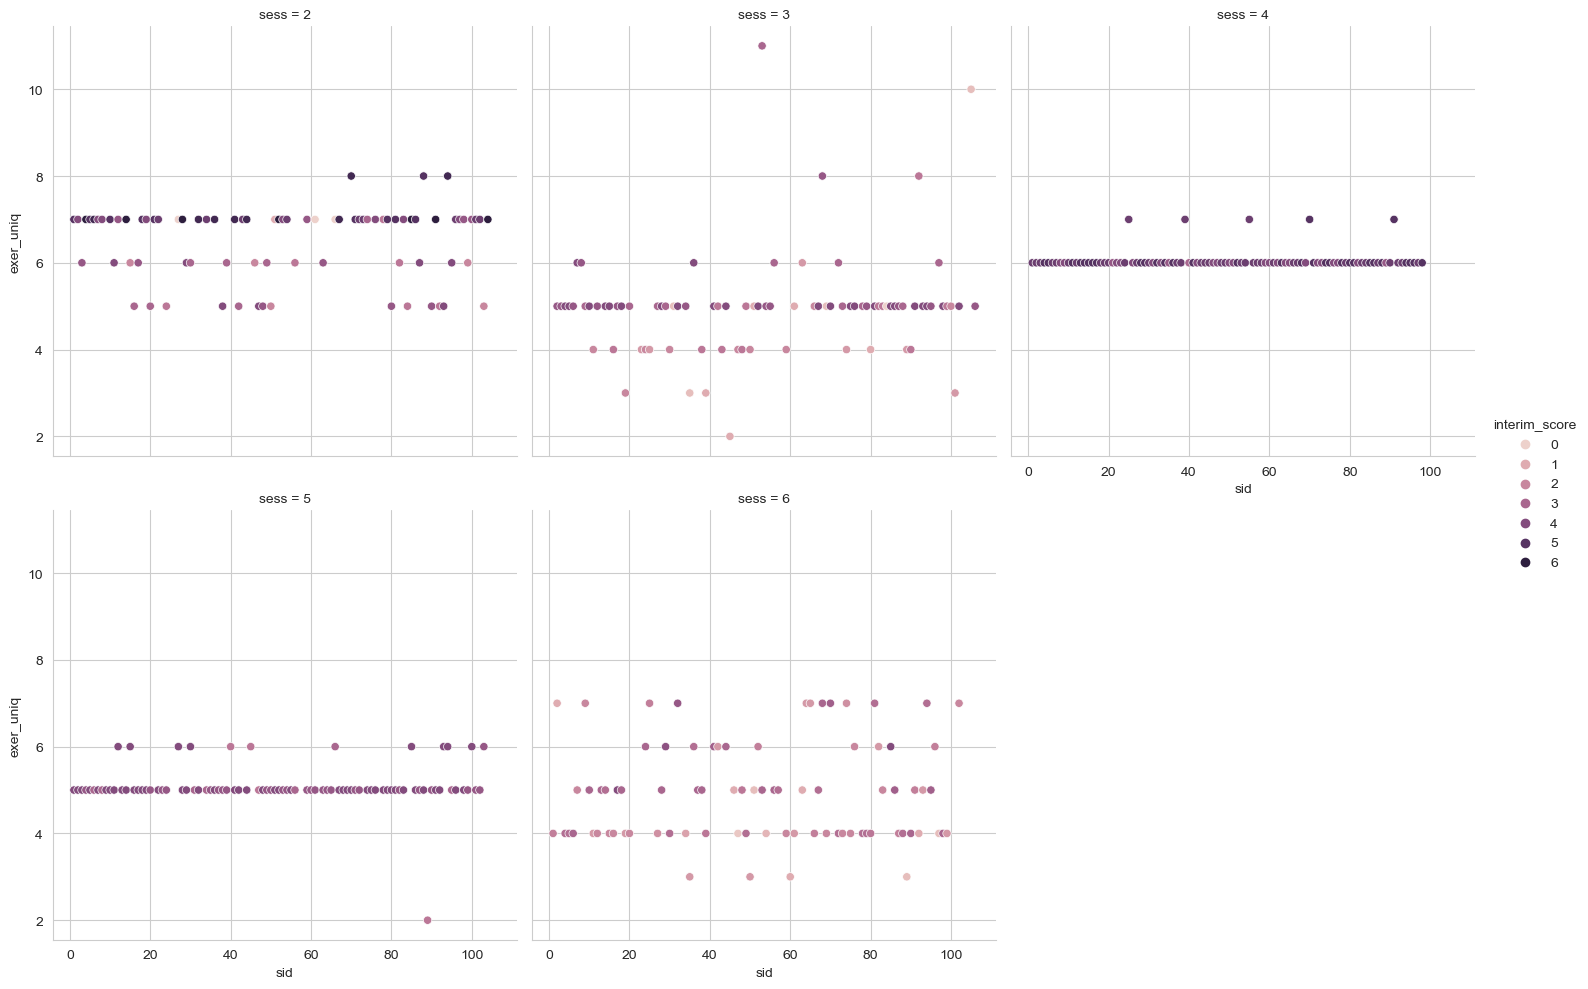

In [111]:
sns.relplot(data = all_counts_interim, x='sid', y='exer_uniq', col='sess', col_wrap=3, hue='interim_score')

plt.show()

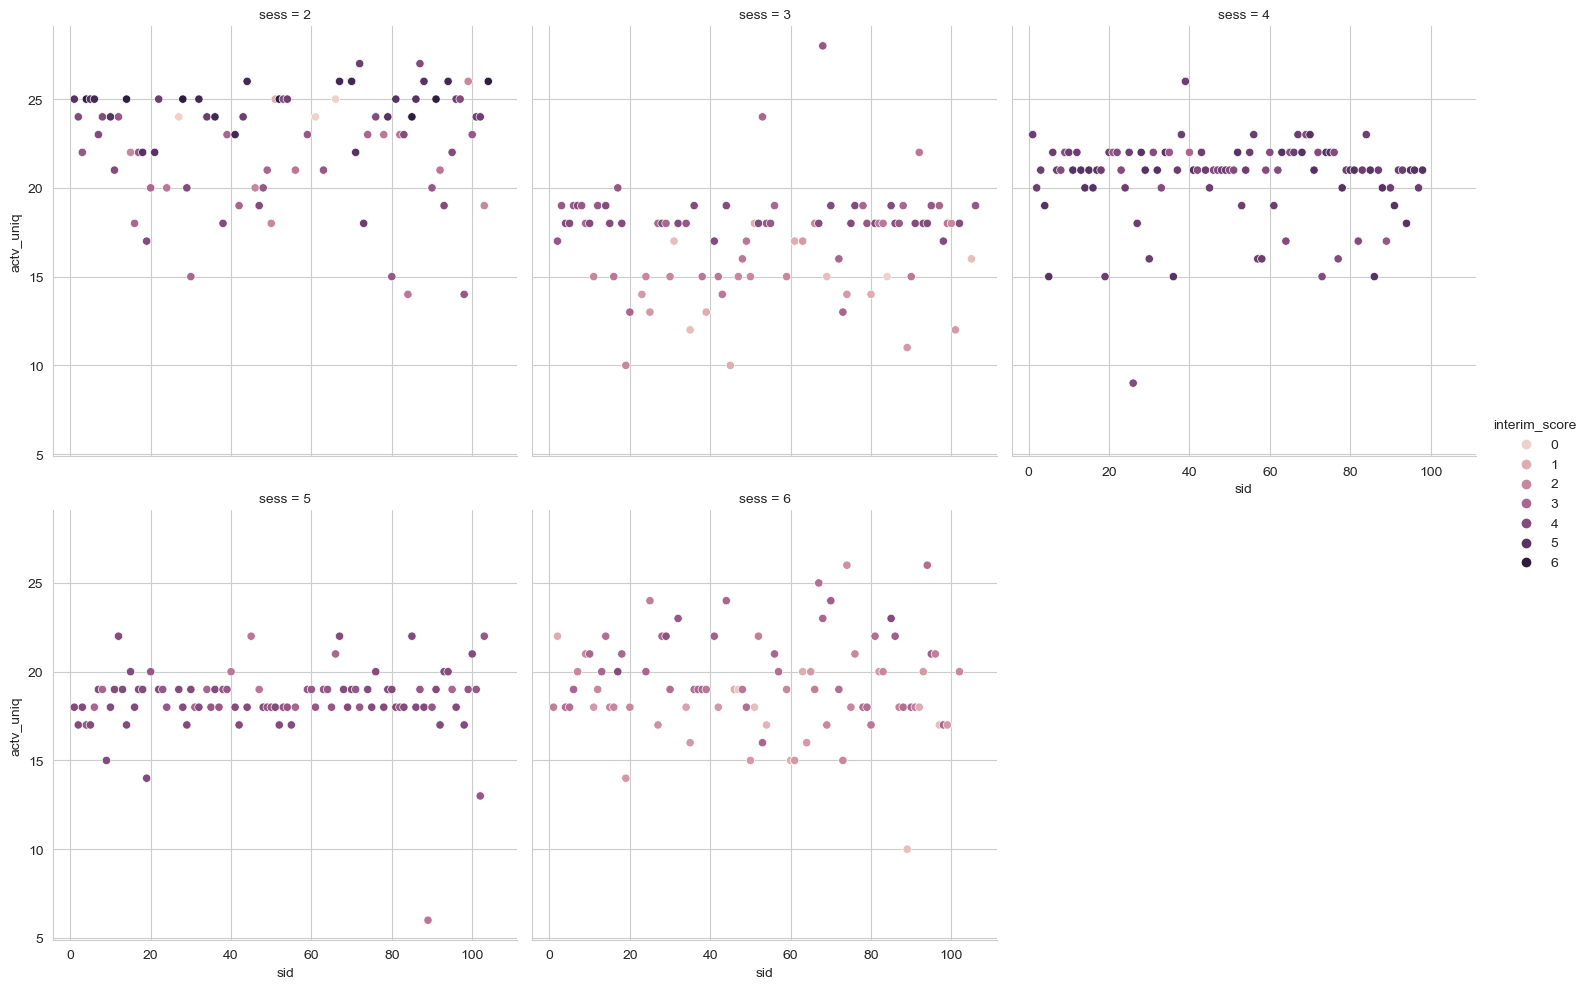

In [112]:
sns.relplot(data = all_counts_interim, x='sid', y='actv_uniq', col='sess', col_wrap=3, hue='interim_score')

plt.show()

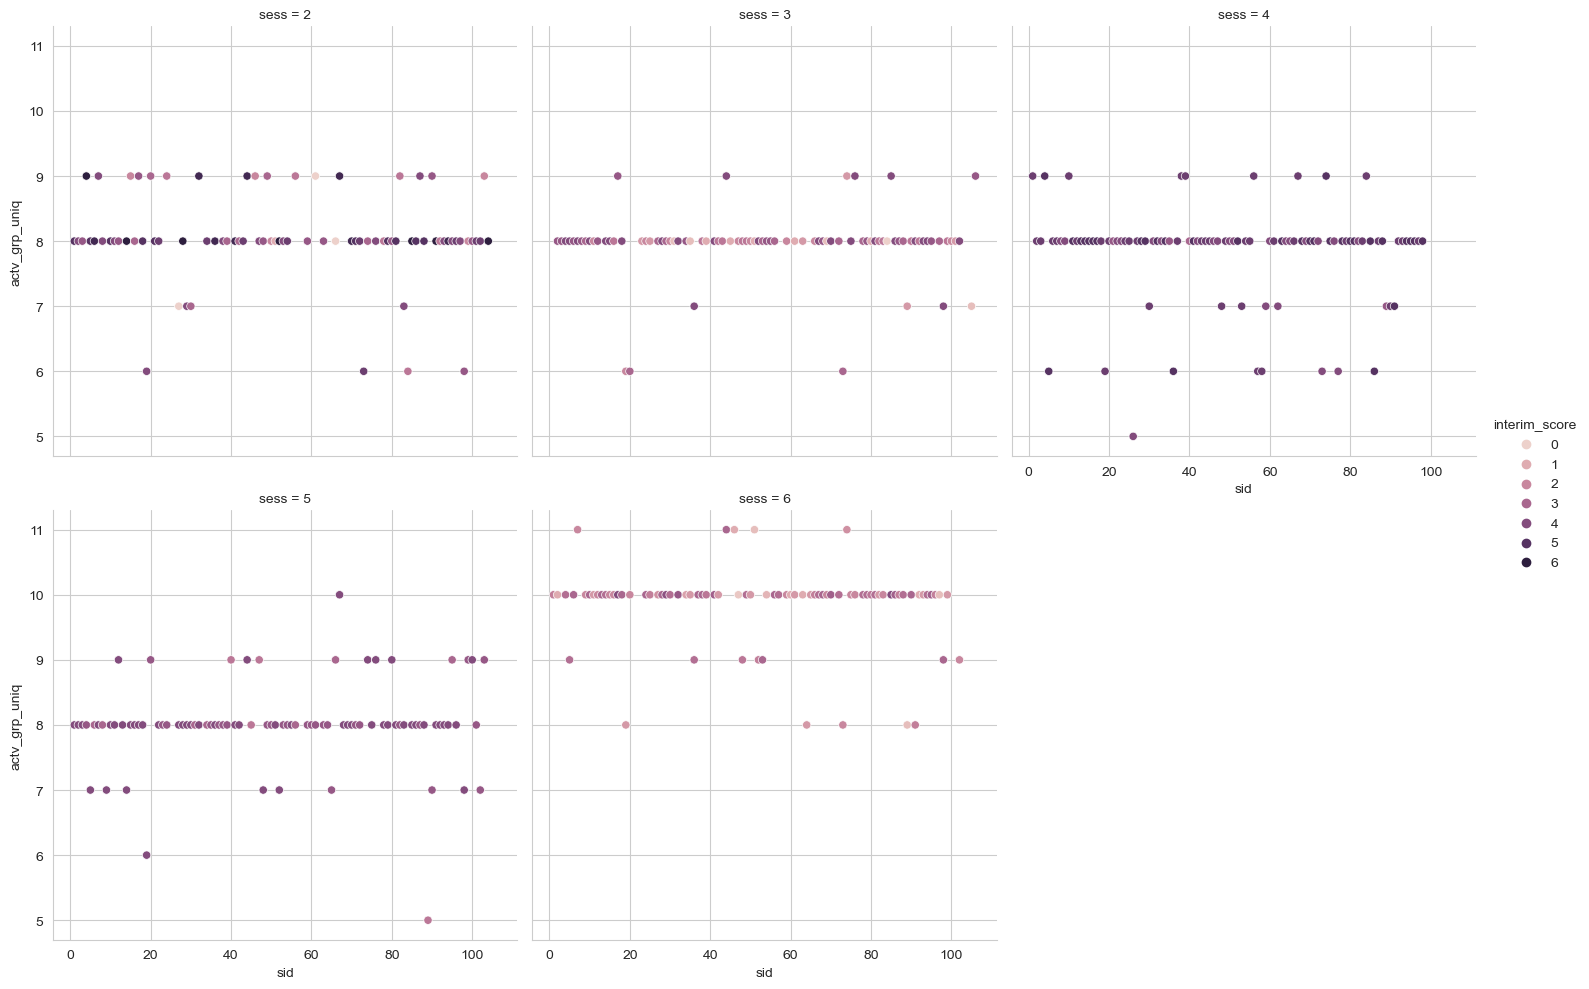

In [113]:
sns.relplot(data = all_counts_interim, x='sid', y='actv_grp_uniq', col='sess', col_wrap=3, hue='interim_score')

plt.show()

#### Scatter plots show relationship between students and interim scores by unique counts of activity groups and sessions for all students

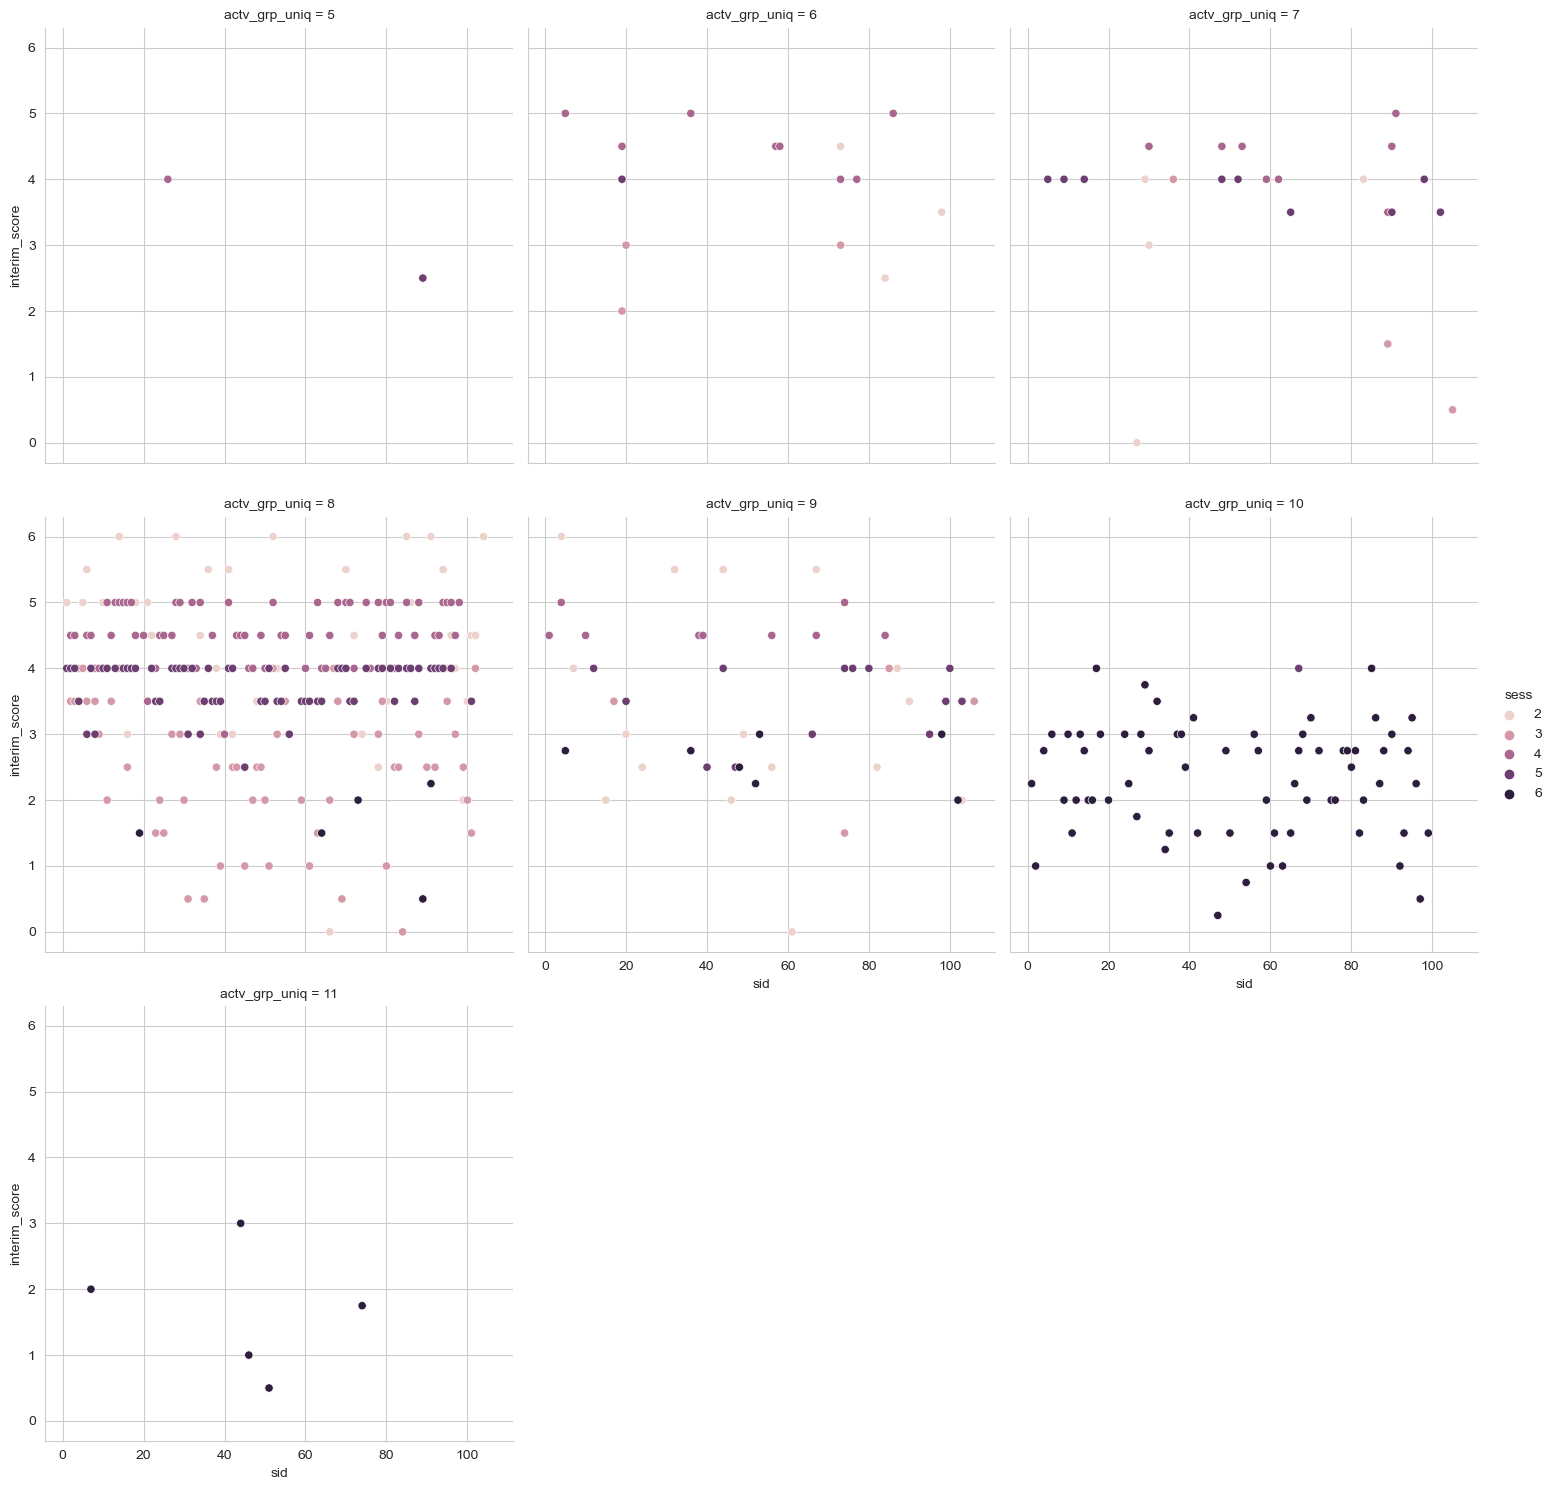

In [114]:
sns.relplot(data = all_counts_interim, x='sid', y='interim_score', col='actv_grp_uniq', col_wrap=3, hue='sess')

plt.show()

 #### Evaluate student progress with final scores

In [115]:
final_df.head()

sid  Es_1q1  Es_1q2  Es_2q1  Es_2q2  Es_3q1  Es_3q2  Es_3q3  Es_3q4  \
0    1     2.0     3.0     1.0     0.5     1.0     2.0     2.0     2.0   
1    2     2.0     3.0     2.0     0.5     1.0     2.0     0.0     2.0   
2    4     2.0     3.0     1.0     0.5     1.0     2.0     0.0     2.0   
3    5     2.0     3.0     2.0     1.5     1.0     2.0     2.0     2.0   
4    7     2.0     3.0     1.0     1.5     1.0     2.0     2.0     2.0   

   Es_3q5  Es_4q1  Es_4q2  Es_5q1  Es_5q2  Es_5q3  Es_6q1  Es_6q2  \
0     3.0    15.0    10.0     2.0    10.0     3.0    25.0    13.0   
1     3.0    15.0     2.0     0.0     5.0     1.5     5.0     0.0   
2     0.0     3.0     4.0     0.0     1.5     0.0     5.0     5.0   
3     3.0     3.0     2.0     1.5     9.0     1.5     2.0     1.0   
4     3.0    15.0    10.0     1.0     2.5     0.0    20.0    12.0   

   final_score  pass  
0         94.5     1  
1         44.0     0  
2         30.0     0  
3         38.5     0  
4         78.0     1

In [116]:
all_counts_final = pd.merge(final_df, sid_counts, on=['sid'])

In [117]:
all_counts_final.head()

sid  Es_1q1  Es_1q2  Es_2q1  Es_2q2  Es_3q1  Es_3q2  Es_3q3  Es_3q4  \
0    1     2.0     3.0     1.0     0.5     1.0     2.0     2.0     2.0   
1    2     2.0     3.0     2.0     0.5     1.0     2.0     0.0     2.0   
2    4     2.0     3.0     1.0     0.5     1.0     2.0     0.0     2.0   
3    5     2.0     3.0     2.0     1.5     1.0     2.0     2.0     2.0   
4    7     2.0     3.0     1.0     1.5     1.0     2.0     2.0     2.0   

   Es_3q5  ...  Es_5q2  Es_5q3  Es_6q1  Es_6q2  final_score  pass  sess_uniq  \
0     3.0  ...    10.0     3.0    25.0    13.0         94.5     1          5   
1     3.0  ...     5.0     1.5     5.0     0.0         44.0     0          6   
2     0.0  ...     1.5     0.0     5.0     5.0         30.0     0          6   
3     3.0  ...     9.0     1.5     2.0     1.0         38.5     0          6   
4     3.0  ...     2.5     0.0    20.0    12.0         78.0     1          6   

   exer_uniq  actv_uniq  actv_grp_uniq  
0         23         78             10  
1         30         92             10  
2         27         83             10  
3         27         83             10  
4         28         88             11  

[5 rows x 23 columns]

In [118]:
var_list_f = uniq_vars + ['final_score']

In [119]:
all_counts_final.reset_index()[['sid'] + var_list_f]

sid  exer_uniq  actv_uniq  actv_grp_uniq  final_score
0     1         23         78             10         94.5
1     2         30         92             10         44.0
2     4         27         83             10         30.0
3     5         27         83             10         38.5
4     7         28         88             11         78.0
..  ...        ...        ...            ...          ...
57  101         17         54              8         32.0
58  102         25         73             10         31.5
59  103         10         34              9         18.5
60  104         11         38              8         92.0
61  106          5         19              9         71.0

[62 rows x 5 columns]

#### Scatter plots show the relationship between the number of unique exercises, activities, and activity groups and the final score

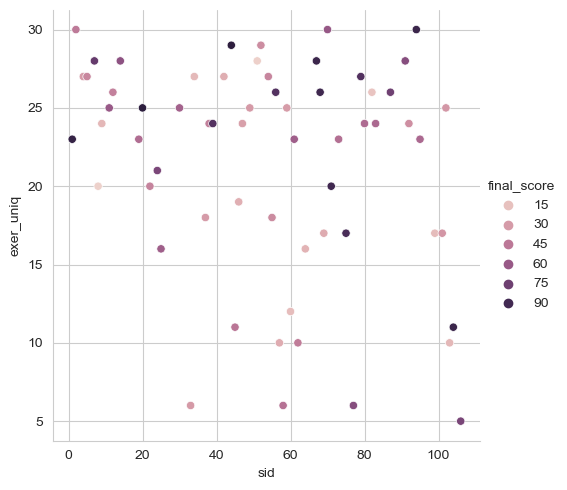

In [120]:
sns.relplot(data = all_counts_final, x='sid', y='exer_uniq', hue='final_score')

plt.show()

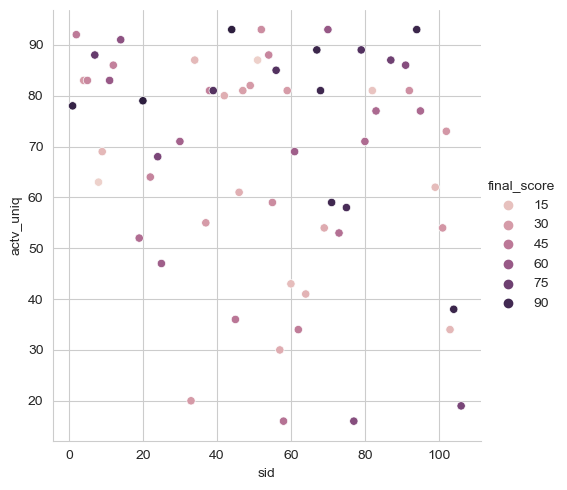

In [121]:
sns.relplot(data = all_counts_final, x='sid', y='actv_uniq', hue='final_score')

plt.show()

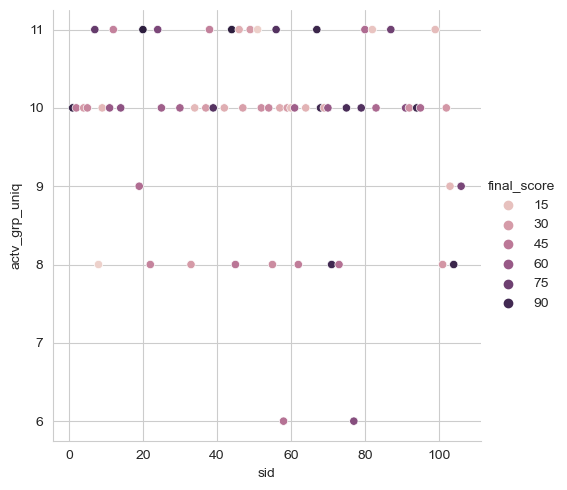

In [122]:
sns.relplot(data = all_counts_final, x='sid', y='actv_grp_uniq', hue='final_score')

plt.show()

In [123]:
all_counts_final_lf = all_counts_final.melt(id_vars=['sid', 'final_score'], value_vars=uniq_vars).copy()

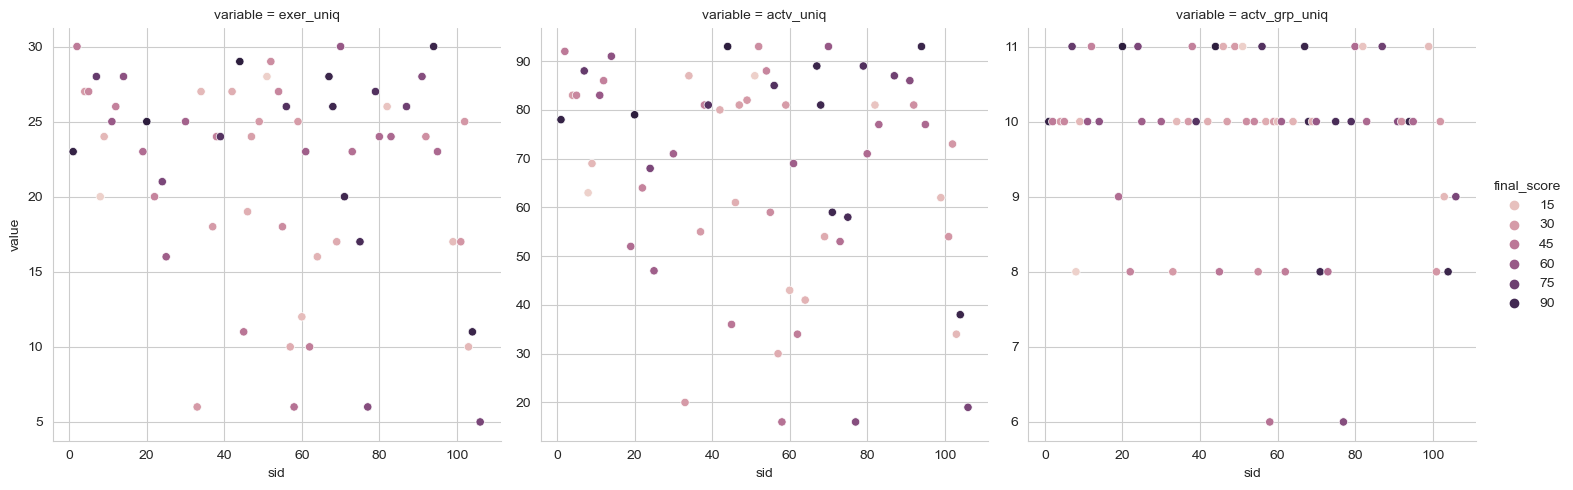

In [124]:
sns.relplot(data = all_counts_final_lf, x='sid', y='value', col='variable', hue='final_score', 
            facet_kws={'sharey': False, 'sharex': True})

plt.show()

## Explore input and output data by student

#### There is a positive relationship between the final score and final questions `Es_4q2`, `Es_6q1`, and `Es_6q2`. If students did well on these questions, they did well on the exam. Together these questions are worth 50% of the final score. 

#### The total time spent did not appear to have an effect on whether a student passed the final. However, the number of sessions and the variety of exercises and activities in which students participated did have an effect. While participating in more sessions and in a variety of exercise and activities did not guarantee a passing score, if students did not participate in at least four sessions (with the exception of two students) and in a variety of exercises and activities, they did not pass.

In [125]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227129 entries, 0 to 227128
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sess           227129 non-null  object 
 1   sid            227129 non-null  object 
 2   start_dt       227129 non-null  object 
 3   end_dt         227128 non-null  object 
 4   exer           227129 non-null  object 
 5   actv           227129 non-null  object 
 6   actv_grp       227129 non-null  object 
 7   total_ms       227128 non-null  float64
 8   idle_ms        226971 non-null  float64
 9   mw             227129 non-null  int64  
 10  mwc            227129 non-null  int64  
 11  mcl            227129 non-null  int64  
 12  mcr            227129 non-null  int64  
 13  mm             227129 non-null  int64  
 14  ks             227129 non-null  int64  
 15  total_ms_wdz   227129 non-null  float64
 16  idle_ms_wdz    227129 non-null  float64
 17  mw_wdz         227129 non-nul

In [126]:
student_summ = inputs_sqrt_df.groupby(['sid']).\
            aggregate(total_ms_sqrt_avg = ('total_ms_sqrt', 'mean'),
                      idle_ms_sqrt_avg = ('idle_ms_sqrt', 'mean'),
                      mw_sqrt_avg = ('mw_sqrt', 'mean'),
                      mwc_sqrt_avg = ('mwc_sqrt', 'mean'),
                      mcl_sqrt_avg = ('mcl_sqrt', 'mean'),
                      mcr_sqrt_avg = ('mcr_sqrt', 'mean'),
                      mm_sqrt_avg = ('mm_sqrt', 'mean'),
                      ks_sqrt_avg = ('ks_sqrt', 'mean'),
                      sess_count = ('sess', 'nunique'),
                      exer_count = ('exer', 'nunique'),
                      act_count = ('actv_grp', 'nunique')).\
            reset_index().copy()

In [127]:
student_summ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sid                113 non-null    int64  
 1   total_ms_sqrt_avg  113 non-null    float64
 2   idle_ms_sqrt_avg   113 non-null    float64
 3   mw_sqrt_avg        113 non-null    float64
 4   mwc_sqrt_avg       113 non-null    float64
 5   mcl_sqrt_avg       113 non-null    float64
 6   mcr_sqrt_avg       113 non-null    float64
 7   mm_sqrt_avg        113 non-null    float64
 8   ks_sqrt_avg        113 non-null    float64
 9   sess_count         113 non-null    int64  
 10  exer_count         113 non-null    int64  
 11  act_count          113 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 10.7 KB


In [128]:
student_sess_summ = inputs_sqrt_df.groupby(['sid', 'sess', 'actv_grp']).\
            aggregate(total_ms_sqrt_avg = ('total_ms_sqrt', 'mean'),
                      idle_ms_sqrt_avg = ('idle_ms_sqrt', 'mean'),
                      mw_sqrt_avg = ('mw_sqrt', 'mean'),
                      mwc_sqrt_avg = ('mwc_sqrt', 'mean'),
                      mcl_sqrt_avg = ('mcl_sqrt', 'mean'),
                      mcr_sqrt_avg = ('mcr_sqrt', 'mean'),
                      mm_sqrt_avg = ('mm_sqrt', 'mean'),
                      ks_sqrt_avg = ('ks_sqrt', 'mean')).\
            reset_index().copy()

In [129]:
student_sess_summ

sid  sess    actv_grp  total_ms_sqrt_avg  idle_ms_sqrt_avg  mw_sqrt_avg  \
0       1     1     Aulaweb          60.291591         89.807296     0.446259   
1       1     1       Blank          23.650093          6.663881     0.000000   
2       1     1       Deeds          84.505693        145.819385     0.065204   
3       1     1     Diagram         181.633786        658.822559     0.085714   
4       1     1       Other          44.700700         31.988323     0.159417   
...   ...   ...         ...                ...               ...          ...   
4243  114     1     Diagram         158.952642        330.417026     0.000000   
4244  114     1       Other          57.737868         64.730754     0.000000   
4245  114     1  Properties          24.490637         13.140994     0.000000   
4246  114     1       Study          74.328287         67.648816     0.000000   
4247  114     1  TextEditor          67.980222         80.704891     0.000000   

      mwc_sqrt_avg  mcl_sqrt_avg  mcr_sqrt_avg  mm_sqrt_avg  ks_sqrt_avg  
0              0.0      1.532660      0.000000    15.575328     0.000000  
1              0.0      1.321056      0.209706    11.315140     0.031463  
2              0.0      2.423351      0.322144    22.286720     0.331025  
3              0.0      4.463416      0.587310    37.397646     0.057143  
4              0.0      1.519802      0.047670    13.975898     0.329639  
...            ...           ...           ...          ...          ...  
4243           0.0      4.270376      0.056569    19.365146     0.080000  
4244           0.0      1.216363      0.022688     6.911911     0.911578  
4245           0.0      1.242434      0.000000     5.467689     0.000000  
4246           0.0      1.364039      0.000000     7.665700     0.133333  
4247           0.0      1.288327      0.000000     6.409345     0.812770  

[4248 rows x 11 columns]

In [130]:
student_sess_summ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sid                4248 non-null   int64  
 1   sess               4248 non-null   int64  
 2   actv_grp           4248 non-null   object 
 3   total_ms_sqrt_avg  4248 non-null   float64
 4   idle_ms_sqrt_avg   4248 non-null   float64
 5   mw_sqrt_avg        4248 non-null   float64
 6   mwc_sqrt_avg       4248 non-null   float64
 7   mcl_sqrt_avg       4248 non-null   float64
 8   mcr_sqrt_avg       4248 non-null   float64
 9   mm_sqrt_avg        4248 non-null   float64
 10  ks_sqrt_avg        4248 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 365.2+ KB


### Inputs and Intermediate Scores
There is an interaction between the continuous variables and the categorical variable `actv_grp`. As revealed by box plots, the distribution of interim scores is different depending on the value of `actv_grp` as follows:

* Sessions 2 and 3: `interim_score` changes when `actv_grp` is 'FSM_Related' or 'Study Materials'
* Sessions 4 and 5: `interim_score` changes when `actv_grp` is 'FSM_Related'
* Session 6: `interim_score` changes when `actv_grp` is 'FSM' or 'Study Materials'

Scatter plots show that the relationships between `interim_score` and the continuous variables change depending on the value of `actv_grp`. For different values of `actv_grp` this relationship is stronger, weaker, or a different direction (positive/negative).

In [131]:
interim_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sid              575 non-null    int64  
 1   interim_session  575 non-null    object 
 2   interim_score    575 non-null    float64
 3   sess             575 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 18.1+ KB


In [132]:
interim_lf['sid'] = interim_lf['sid'].astype('int')
interim_lf['sess'] = interim_lf['sess'].astype('int')

In [133]:
by_student_interim_init = pd.merge(interim_lf.drop(columns=['interim_session'].copy()), student_sess_summ, 
                                   on=['sid','sess'], how='left')

In [134]:
by_student_interim_init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3779 entries, 0 to 3778
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sid                3779 non-null   int64  
 1   interim_score      3779 non-null   float64
 2   sess               3779 non-null   int64  
 3   actv_grp           3642 non-null   object 
 4   total_ms_sqrt_avg  3642 non-null   float64
 5   idle_ms_sqrt_avg   3642 non-null   float64
 6   mw_sqrt_avg        3642 non-null   float64
 7   mwc_sqrt_avg       3642 non-null   float64
 8   mcl_sqrt_avg       3642 non-null   float64
 9   mcr_sqrt_avg       3642 non-null   float64
 10  mm_sqrt_avg        3642 non-null   float64
 11  ks_sqrt_avg        3642 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 383.8+ KB


In [135]:
by_student_interim_init

sid  interim_score  sess actv_grp  total_ms_sqrt_avg  idle_ms_sqrt_avg  \
0       1            5.0     2  Aulaweb          19.023607          5.364728   
1       1            5.0     2    Blank          13.122374          4.530336   
2       1            5.0     2    Deeds          94.955802        196.928061   
3       1            5.0     2  Diagram         102.537769        223.944413   
4       1            5.0     2    Other          40.282864         13.255219   
...   ...            ...   ...      ...                ...               ...   
3774  111            0.0     6      NaN                NaN               NaN   
3775  112            0.0     6      NaN                NaN               NaN   
3776  113            0.0     6      NaN                NaN               NaN   
3777  114            0.0     6      NaN                NaN               NaN   
3778  115            0.0     6      NaN                NaN               NaN   

      mw_sqrt_avg  mwc_sqrt_avg  mcl_sqrt_avg  mcr_sqrt_avg  mm_sqrt_avg  \
0        0.000000           0.0      1.660312      0.000000     9.816710   
1        0.039229           0.0      1.335669      0.124054     9.710477   
2        0.168232           0.0      2.899294      0.408978    23.214648   
3        0.000000           0.0      2.703978      0.036262    23.804276   
4        0.420092           0.0      1.743471      0.000000    13.599805   
...           ...           ...           ...           ...          ...   
3774          NaN           NaN           NaN           NaN          NaN   
3775          NaN           NaN           NaN           NaN          NaN   
3776          NaN           NaN           NaN           NaN          NaN   
3777          NaN           NaN           NaN           NaN          NaN   
3778          NaN           NaN           NaN           NaN          NaN   

      ks_sqrt_avg  
0        0.000000  
1        0.000000  
2        0.366994  
3        0.000000  
4        0.161676  
...           ...  
3774          NaN  
3775          NaN  
3776          NaN  
3777          NaN  
3778          NaN  

[3779 rows x 12 columns]

In [136]:
by_student_interim_df = by_student_interim_init.copy()

In [137]:
by_student_interim_lf = by_student_interim_df.melt(id_vars=['sid', 'sess', 'actv_grp', 'interim_score'])

In [138]:
by_student_interim_lf

sid  sess actv_grp  interim_score           variable       value
0        1     2  Aulaweb            5.0  total_ms_sqrt_avg   19.023607
1        1     2    Blank            5.0  total_ms_sqrt_avg   13.122374
2        1     2    Deeds            5.0  total_ms_sqrt_avg   94.955802
3        1     2  Diagram            5.0  total_ms_sqrt_avg  102.537769
4        1     2    Other            5.0  total_ms_sqrt_avg   40.282864
...    ...   ...      ...            ...                ...         ...
30227  111     6      NaN            0.0        ks_sqrt_avg         NaN
30228  112     6      NaN            0.0        ks_sqrt_avg         NaN
30229  113     6      NaN            0.0        ks_sqrt_avg         NaN
30230  114     6      NaN            0.0        ks_sqrt_avg         NaN
30231  115     6      NaN            0.0        ks_sqrt_avg         NaN

[30232 rows x 6 columns]

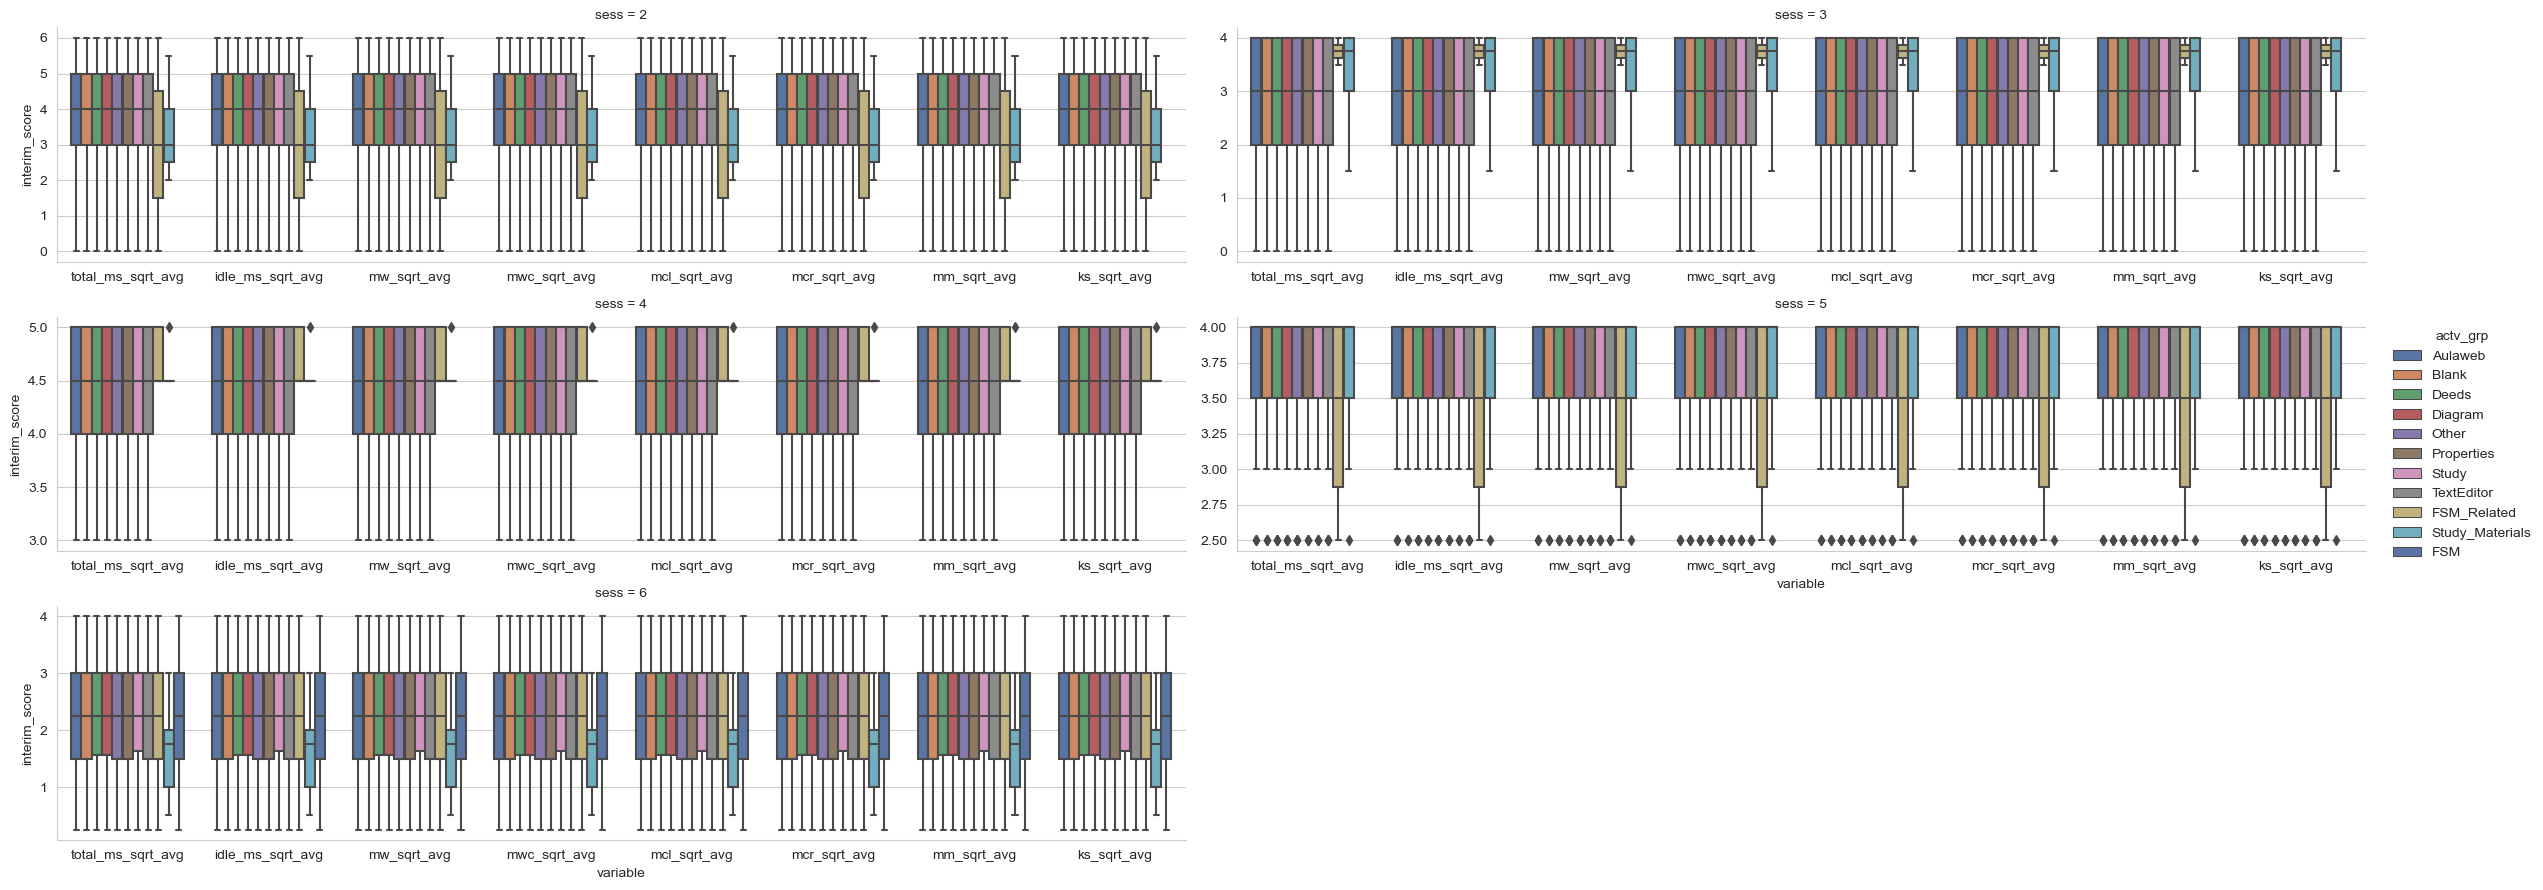

In [139]:
sns.catplot(data=by_student_interim_lf, x = 'variable', y = 'interim_score', 
            col = 'sess', col_wrap = 2, kind = 'box', palette='deep',
            hue = 'actv_grp', height=3, aspect=4, 
            sharey=False, sharex=False)

plt.show()

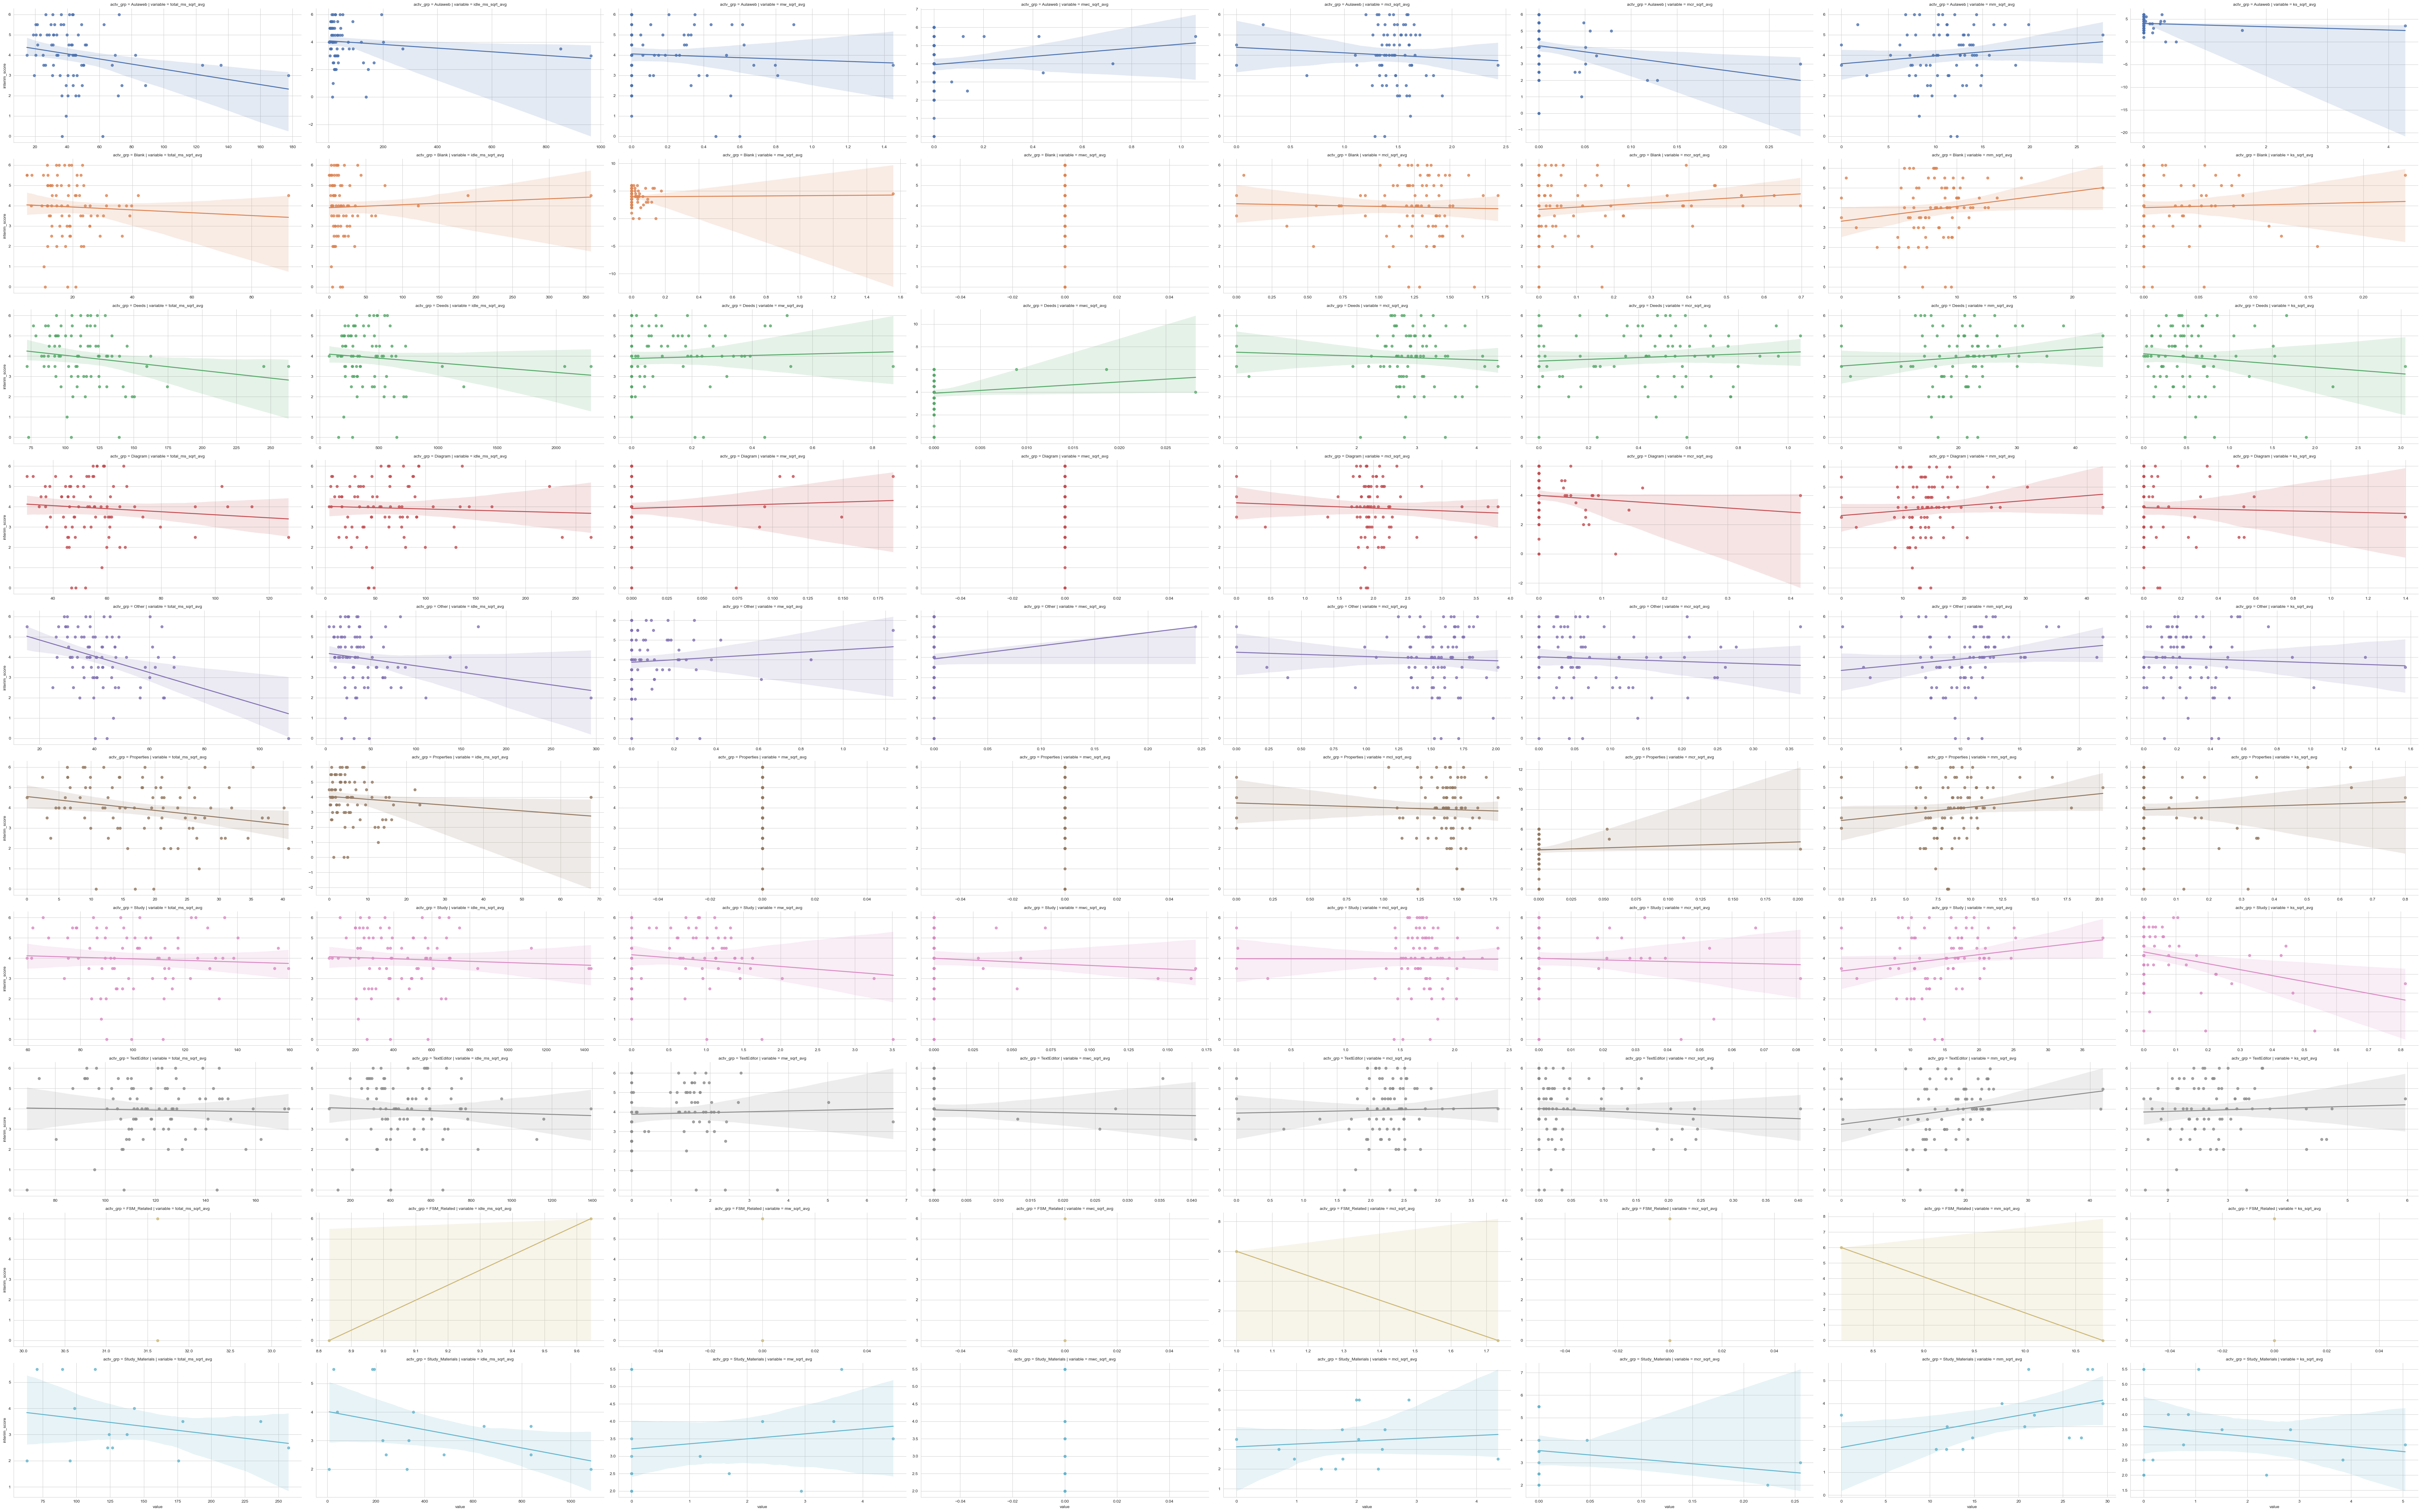

In [140]:
sns.lmplot(data = by_student_interim_lf.loc[by_student_interim_lf.sess == 2], x='value', y='interim_score', 
           col='variable', row='actv_grp', hue='actv_grp', palette='deep',
           aspect=2, facet_kws=dict(sharex=False, sharey=False))

plt.show()

### Inputs and Final Score
The total time spent did not appear to have an effect on whether a student passed the final. However, the number of sessions and the variety of exercises and activities in which students participated did have an effect. While participating in more sessions and in a variety of exercise and activities did not guarantee a passing score, if students did not participate in at least four sessions (with the exception of two students) and in a variety of exercises and activities, they did not pass.

In [141]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sid          62 non-null     int64  
 1   Es_1q1       62 non-null     float64
 2   Es_1q2       62 non-null     float64
 3   Es_2q1       62 non-null     float64
 4   Es_2q2       62 non-null     float64
 5   Es_3q1       62 non-null     float64
 6   Es_3q2       62 non-null     float64
 7   Es_3q3       62 non-null     float64
 8   Es_3q4       62 non-null     float64
 9   Es_3q5       62 non-null     float64
 10  Es_4q1       62 non-null     float64
 11  Es_4q2       62 non-null     float64
 12  Es_5q1       62 non-null     float64
 13  Es_5q2       62 non-null     float64
 14  Es_5q3       62 non-null     float64
 15  Es_6q1       62 non-null     float64
 16  Es_6q2       62 non-null     float64
 17  final_score  62 non-null     float64
 18  pass         62 non-null     int64  
dtypes: float64

In [142]:
final_df.columns

Index(['sid', 'Es_1q1', 'Es_1q2', 'Es_2q1', 'Es_2q2', 'Es_3q1', 'Es_3q2',
       'Es_3q3', 'Es_3q4', 'Es_3q5', 'Es_4q1', 'Es_4q2', 'Es_5q1', 'Es_5q2',
       'Es_5q3', 'Es_6q1', 'Es_6q2', 'final_score', 'pass'],
      dtype='object')

In [143]:
by_student_final_init = pd.merge(student_summ, final_df, on='sid', how='left')

In [144]:
by_student_final_init.rename(columns={"Es_1_1": "final_Es_1_1", "Es_1_2": "final_Es_1_2", "Es_2_1": "final_Es_2_1", 
                              "Es_2_2": "final_Es_2_2", "Es_3_1": "final_Es_3_1", "Es_3_2": "final_Es_3_2", 
                              "Es_3_3": "final_Es_3_3", "Es_3_4": "final_Es_3_4", "Es_3_5": "final_Es_3_5", 
                              "Es_4_1": "final_Es_4_1", "Es_4_2": "final_Es_4_2", "Es_5_1": "final_Es_5_1", 
                              "Es_5_2": "final_Es_5_2", "Es_5_3": "final_Es_5_3", "Es_6_1": "final_Es_6_1", 
                              "Es_6_2": "final_Es_6_2"}, inplace=True)

In [145]:
by_student_final_init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sid                113 non-null    int64  
 1   total_ms_sqrt_avg  113 non-null    float64
 2   idle_ms_sqrt_avg   113 non-null    float64
 3   mw_sqrt_avg        113 non-null    float64
 4   mwc_sqrt_avg       113 non-null    float64
 5   mcl_sqrt_avg       113 non-null    float64
 6   mcr_sqrt_avg       113 non-null    float64
 7   mm_sqrt_avg        113 non-null    float64
 8   ks_sqrt_avg        113 non-null    float64
 9   sess_count         113 non-null    int64  
 10  exer_count         113 non-null    int64  
 11  act_count          113 non-null    int64  
 12  Es_1q1             62 non-null     float64
 13  Es_1q2             62 non-null     float64
 14  Es_2q1             62 non-null     float64
 15  Es_2q2             62 non-null     float64
 16  Es_3q1             62 non-

In [146]:
by_student_final_df = by_student_final_init.copy()

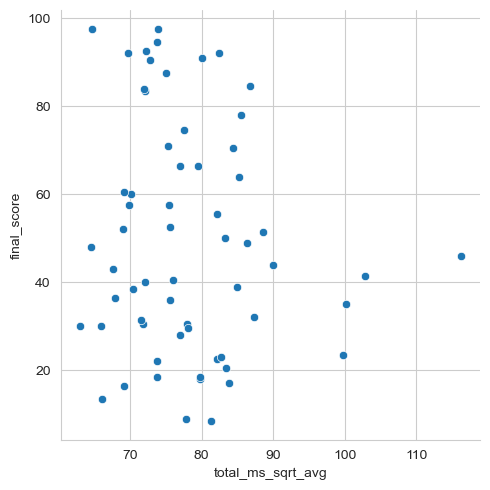

In [147]:
sns.relplot(data = by_student_final_df, x='total_ms_sqrt_avg', y='final_score', kind='scatter')

plt.show()

In [148]:
by_student_final_df.columns

Index(['sid', 'total_ms_sqrt_avg', 'idle_ms_sqrt_avg', 'mw_sqrt_avg',
       'mwc_sqrt_avg', 'mcl_sqrt_avg', 'mcr_sqrt_avg', 'mm_sqrt_avg',
       'ks_sqrt_avg', 'sess_count', 'exer_count', 'act_count', 'Es_1q1',
       'Es_1q2', 'Es_2q1', 'Es_2q2', 'Es_3q1', 'Es_3q2', 'Es_3q3', 'Es_3q4',
       'Es_3q5', 'Es_4q1', 'Es_4q2', 'Es_5q1', 'Es_5q2', 'Es_5q3', 'Es_6q1',
       'Es_6q2', 'final_score', 'pass'],
      dtype='object')

In [149]:
by_student_final_lf = by_student_final_df.melt(id_vars=['sid', 'final_score', 'pass'])

In [150]:
by_student_final_lf.isna().sum()

sid               0
final_score    1377
pass           1377
variable          0
value           816
dtype: int64

In [151]:
by_student_final_lf.variable.unique()

array(['total_ms_sqrt_avg', 'idle_ms_sqrt_avg', 'mw_sqrt_avg',
       'mwc_sqrt_avg', 'mcl_sqrt_avg', 'mcr_sqrt_avg', 'mm_sqrt_avg',
       'ks_sqrt_avg', 'sess_count', 'exer_count', 'act_count', 'Es_1q1',
       'Es_1q2', 'Es_2q1', 'Es_2q2', 'Es_3q1', 'Es_3q2', 'Es_3q3',
       'Es_3q4', 'Es_3q5', 'Es_4q1', 'Es_4q2', 'Es_5q1', 'Es_5q2',
       'Es_5q3', 'Es_6q1', 'Es_6q2'], dtype=object)

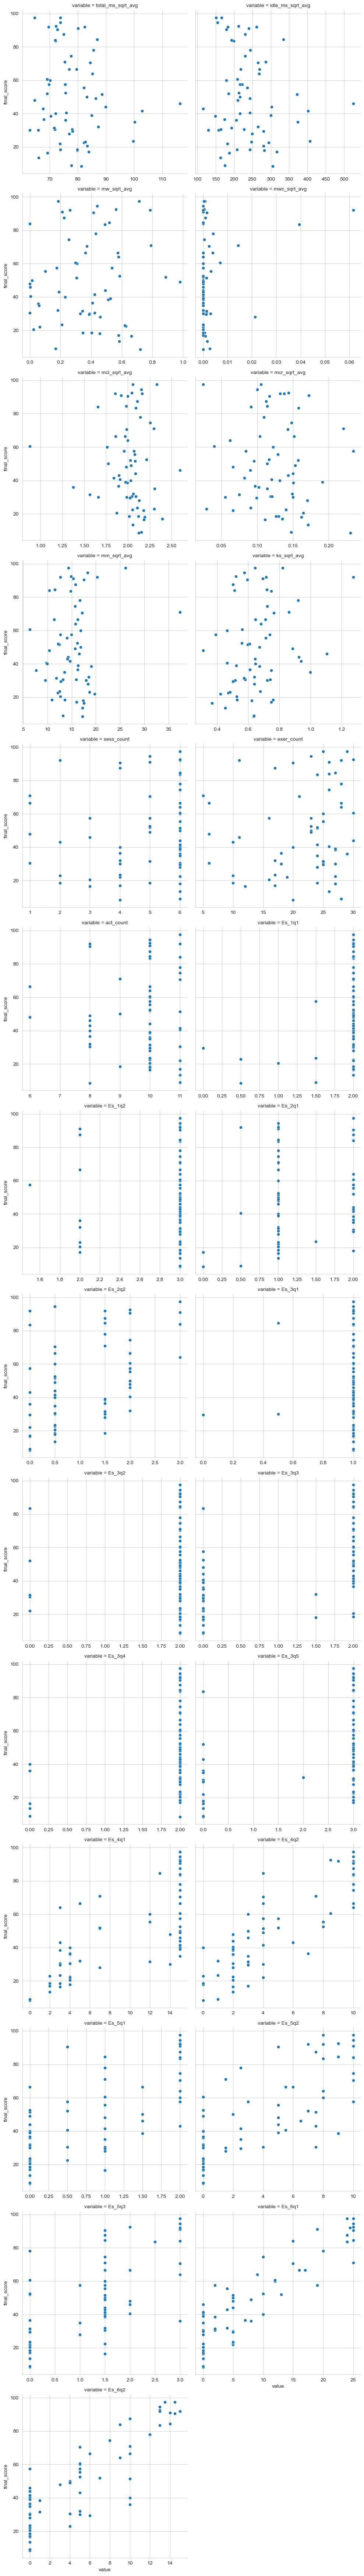

In [152]:
sns.relplot(data = by_student_final_lf, x='value', y='final_score', 
            col='variable', col_wrap=2, 
            kind='scatter', facet_kws={'sharex': False})

plt.show()

In [153]:
pts_final

question  question_points
0        Es_1q1                2
1        Es_1q2                3
2        Es_2q1                2
3        Es_2q2                3
4        Es_3q1                1
5        Es_3q2                2
6        Es_3q3                2
7        Es_3q4                2
8        Es_3q5                3
9        Es_4q1               15
10       Es_4q2               10
11       Es_5q1                2
12       Es_5q2               10
13       Es_5q3                3
14       Es_6q1               25
15       Es_6q2               15
16  final_score              100

In [154]:
by_student_final_df

sid  total_ms_sqrt_avg  idle_ms_sqrt_avg  mw_sqrt_avg  mwc_sqrt_avg  \
0      1          73.788436        154.779253     0.438855      0.000000   
1      2          89.933800        302.859102     0.492373      0.000000   
2      3          67.607202        177.972725     0.200320      0.000000   
3      4          62.942091        158.045946     0.389018      0.003008   
4      5          70.455967        149.440560     0.512454      0.000000   
..   ...                ...               ...          ...           ...   
108  110          69.048451        157.689999     0.371386      0.000000   
109  111          72.166219         96.645577     0.000000      0.000000   
110  112          82.276579        202.644242     0.234535      0.003961   
111  113          81.240771        177.109727     0.000000      0.000000   
112  114          65.691443        107.541299     0.000000      0.000000   

     mcl_sqrt_avg  mcr_sqrt_avg  mm_sqrt_avg  ks_sqrt_avg  sess_count  ...  \
0        2.154162      0.100167    18.288536     0.575429           5  ...   
1        2.087846      0.149846    14.232934     0.924389           6  ...   
2        2.010457      0.146013    13.700542     0.648768           4  ...   
3        1.661840      0.055576     9.571955     0.721963           6  ...   
4        1.993788      0.150808    19.069058     0.673137           6  ...   
..            ...           ...          ...          ...         ...  ...   
108      2.058844      0.106372    14.245068     0.547387           1  ...   
109      2.087146      0.213448    13.376083     0.407551           1  ...   
110      1.934829      0.106930    17.046930     0.468303           1  ...   
111      1.940302      0.183114    12.548179     0.373359           1  ...   
112      1.531306      0.022377     7.922776     0.487939           1  ...   

     Es_3q5  Es_4q1  Es_4q2  Es_5q1  Es_5q2  Es_5q3  Es_6q1  Es_6q2  \
0       3.0    15.0    10.0     2.0    10.0     3.0    25.0    13.0   
1       3.0    15.0     2.0     0.0     5.0     1.5     5.0     0.0   
2       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3       0.0     3.0     4.0     0.0     1.5     0.0     5.0     5.0   
4       3.0     3.0     2.0     1.5     9.0     1.5     2.0     1.0   
..      ...     ...     ...     ...     ...     ...     ...     ...   
108     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
109     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
110     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
111     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
112     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     final_score  pass  
0           94.5   1.0  
1           44.0   0.0  
2            NaN   NaN  
3           30.0   0.0  
4           38.5   0.0  
..           ...   ...  
108          NaN   NaN  
109          NaN   NaN  
110          NaN   NaN  
111          NaN   NaN  
112          NaN   NaN  

[113 rows x 30 columns]

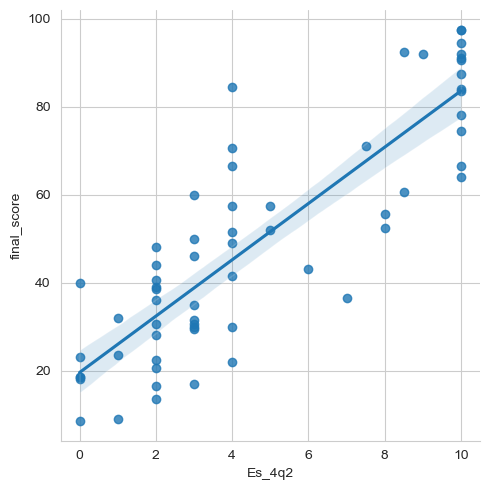

In [155]:
sns.lmplot(data = by_student_final_df, x='Es_4q2', y='final_score')

plt.show()

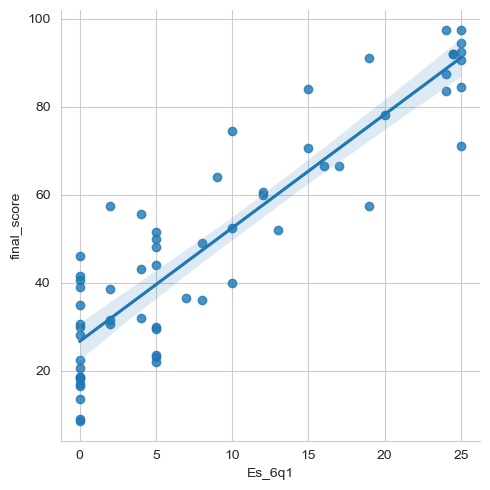

In [156]:
sns.lmplot(data = by_student_final_df, x='Es_6q1', y='final_score')

plt.show()

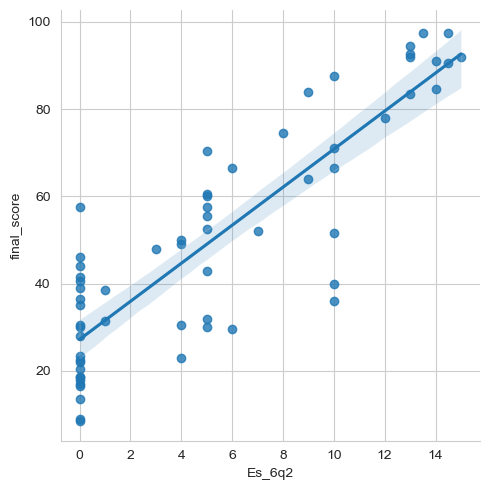

In [157]:
sns.lmplot(data = by_student_final_df, x='Es_6q2', y='final_score')

plt.show()

#### The box plots below show that participation in the session, exercises, and activities influences final grades

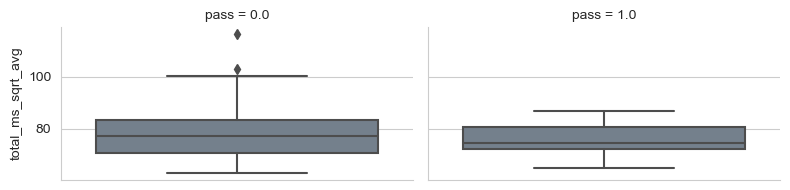

In [158]:
sns.catplot(data=by_student_final_df, 
            y='total_ms_sqrt_avg', col='pass', 
            kind='box', 
            color='slategray',
            sharex = False, height=2, aspect=2)

plt.show()

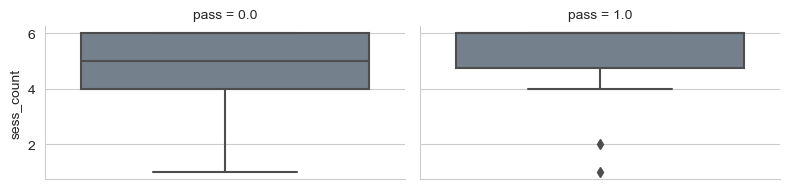

In [159]:
sns.catplot(data=by_student_final_df, 
            y='sess_count', col='pass', 
            kind='box', 
            color='slategray',
            sharex = False, height=2, aspect=2)

plt.show()

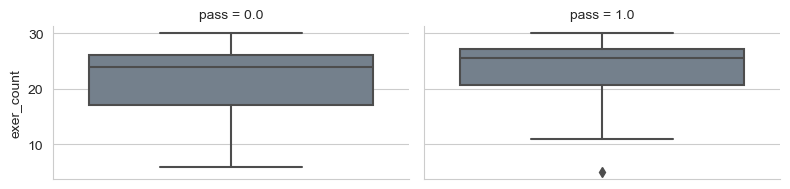

In [160]:
sns.catplot(data=by_student_final_df, 
            y='exer_count', col='pass', 
            kind='box',
            color='slategray',
            sharex = False, height=2, aspect=2)

plt.show()

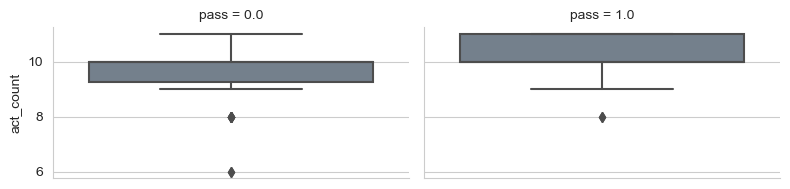

In [161]:
sns.catplot(data=by_student_final_df, 
            y='act_count', col='pass', 
            kind='box',
            color='slategray',
            sharex = False, height=2, aspect=2)

plt.show()